Upload the file after data Cleaning in Alteryx

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Output_final.xlsx to Output_final.xlsx


###Add the Diagnosis Code Mapping (1st letter of Claim Diagnosis Code)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

medicare_df=pd.read_excel('Output_final.xlsx')
medicare_df['Diagnosis_Code_Mapping_Data'] = medicare_df['clm_dgns_cd'].str[0]
medicare_df

,cur_clm_uniq_id,bene_mbi_id,fac_prvdr_npi_num,clm_from_dt,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,clm_line_hcpcs_cd,...,Patient_id,Age,Gender,Right_ZIP Code,Territory Name,Region Name,diagnosis_code_market,Diagnosis Code Market,Right_Specialty,Diagnosis_Code_Mapping_Data
0,676026,13122,4225687563,7/11/2018,1/27/2018,H5210,NaN,NaN,4.0,92920,...,13122,46,Male,76087,"Dallas, TX",Southeast,H,H,"Eye and Adnexa, Ear and Mastoid Process",I
1,787471,12625,6514841039,2/28/2016,5/6/2016,H25812,441.53,16611.244990,4.0,J3010,...,12625,42,Female,60960,"New York, NY",Northeast,H,H,"Eye and Adnexa, Ear and Mastoid Process",C
2,1000626,11388,6514841039,12/15/2018,12/29/2018,H26491,86.92,7.166678,2.0,J1885,...,11388,78,Male,60960,"New York, NY",Northeast,H,H,"Eye and Adnexa, Ear and Mastoid Process",I
3,1306770,11601,3357120922,5/24/2017,8/8/2017,H938X1,NaN,NaN,1.0,J1885,...,11601,40,Male,40050,"San Jose, CA",West,H,H,"Eye and Adnexa, Ear and Mastoid Process",I
4,1699222,11432,8091579128,8/23/2018,10/17/2018,H16012,NaN,NaN,1.0,G9171,...,11432,70,Female,47324,"San Jose, CA",West,H,H,"Eye and Adnexa, Ear and Mastoid Process",I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,275913,12810,2483100161,5/4/2017,12/4/2016,D72829,NaN,NaN,1.0,J3010,...,12810,84,Male,43950,"Boston, MA",Northeast,D,D,"Neoplasms, Blood, Blood-forming Organs",I
19148,1458579,10870,6220574465,12/11/2017,7/29/2017,D1779,1158.61,11246.139710,9.0,J2704,...,10870,64,Male,28164,"Houston, TX",Southeast,D,D,"Neoplasms, Blood, Blood-forming Organs",I
19149,496333,11777,6220574465,11/19/2018,9/19/2018,D472,NaN,NaN,4.0,J2704,...,11777,69,Male,28164,"Houston, TX",Southeast,D,D,"Neoplasms, Blood, Blood-forming Organs",I
19150,739172,11508,6220574465,12/17/2016,8/7/2017,D538,NaN,15653.767960,5.0,84403,...,11508,71,Female,28164,"Houston, TX",Southeast,D,D,"Neoplasms, Blood, Blood-forming Organs",I


#### Filter only the required columns

In [ ]:
medicare_df = medicare_df[['cur_clm_uniq_id','bene_mbi_id','fac_prvdr_npi_num','clm_from_dt','clm_line_hcpcs_cd',
                                                     'clm_line_cvrd_pd_amt','clm_dgns_cd','clm_line_alowd_chrg_amt','City','State','ZIP Code',
                                                     'Specialty','Age','Gender','Territory Name','Region Name','Diagnosis_Code_Mapping_Data']].drop_duplicates().rename(
                               columns= {'cur_clm_uniq_id': 'Claim_ID',
             'bene_mbi_id': 'Patient_ID',
             'fac_prvdr_npi_num': 'HCP_NPI_ID',
             'clm_from_dt': 'Claim_Date',
             'clm_line_hcpcs_cd': 'Procedure_code',
            'clm_line_cvrd_pd_amt': 'Amt_paid_by_insurer',
             'clm_dgns_cd': 'diagnosis_code',
            'clm_line_alowd_chrg_amt': 'claim_cost',
                          }
    )

medicare_df


,Claim_ID,Patient_ID,HCP_NPI_ID,Claim_Date,Procedure_code,Amt_paid_by_insurer,diagnosis_code,claim_cost,City,State,ZIP Code,Specialty,Age,Gender,Territory Name,Region Name,Diagnosis_Code_Mapping_Data
0,676026,13122,4225687563,7/11/2018,92920,-0.92,I10,4.55,Jessicaview,DE,76087,Anesthesiology,46,Male,"Dallas, TX",Southeast,I
1,787471,12625,6514841039,2/28/2016,J3010,-4.00,C439,NaN,Port Douglas,MP,60960,Cardiology,42,Female,"New York, NY",Northeast,C
2,1000626,11388,6514841039,12/15/2018,J1885,2.53,I5033,NaN,Port Douglas,MP,60960,Cardiology,78,Male,"New York, NY",Northeast,I
3,1306770,11601,3357120922,5/24/2017,J1885,75.63,I10,233.73,Port Paulmouth,VA,40050,Neurology,40,Male,"San Jose, CA",West,I
4,1699222,11432,8091579128,8/23/2018,G9171,50.54,I10,78.91,Nielsentown,GU,47324,Anesthesiology,70,Female,"San Jose, CA",West,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,275913,12810,2483100161,5/4/2017,J3010,64.78,I10,103.01,Brianville,MN,43950,Orthopedics,84,Male,"Boston, MA",Northeast,I
19148,1458579,10870,6220574465,12/11/2017,J2704,5.68,I429,NaN,Williambury,CT,28164,Anesthesiology,64,Male,"Houston, TX",Southeast,I
19149,496333,11777,6220574465,11/19/2018,J2704,5.73,I10,14.51,Williambury,CT,28164,Anesthesiology,69,Male,"Houston, TX",Southeast,I
19150,739172,11508,6220574465,12/17/2016,84403,2.80,I10,7.58,Williambury,CT,28164,Anesthesiology,71,Female,"Houston, TX",Southeast,I


medicare_df = medicare_df.loc[(medicare_df.Procedure_code.isnull() | medicare_df.diagnosis_code.isnull())]
medicare_df.shape[0]

#### Remove the rows with Null Procedure codes and Diagnosis Codes

In [ ]:
medicare_filtered = medicare_df.loc[
    ~(~medicare_df.Procedure_code.notnull()) | (~medicare_df.diagnosis_code.notnull())
]
medicare_filtered

,Claim_ID,Patient_ID,HCP_NPI_ID,Claim_Date,Procedure_code,Amt_paid_by_insurer,diagnosis_code,claim_cost,City,State,ZIP Code,Specialty,Age,Gender,Territory Name,Region Name,Diagnosis_Code_Mapping_Data
0,676026,13122,4225687563,7/11/2018,92920,-0.92,I10,4.55,Jessicaview,DE,76087,Anesthesiology,46,Male,"Dallas, TX",Southeast,I
1,787471,12625,6514841039,2/28/2016,J3010,-4.00,C439,NaN,Port Douglas,MP,60960,Cardiology,42,Female,"New York, NY",Northeast,C
2,1000626,11388,6514841039,12/15/2018,J1885,2.53,I5033,NaN,Port Douglas,MP,60960,Cardiology,78,Male,"New York, NY",Northeast,I
3,1306770,11601,3357120922,5/24/2017,J1885,75.63,I10,233.73,Port Paulmouth,VA,40050,Neurology,40,Male,"San Jose, CA",West,I
4,1699222,11432,8091579128,8/23/2018,G9171,50.54,I10,78.91,Nielsentown,GU,47324,Anesthesiology,70,Female,"San Jose, CA",West,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,275913,12810,2483100161,5/4/2017,J3010,64.78,I10,103.01,Brianville,MN,43950,Orthopedics,84,Male,"Boston, MA",Northeast,I
19148,1458579,10870,6220574465,12/11/2017,J2704,5.68,I429,NaN,Williambury,CT,28164,Anesthesiology,64,Male,"Houston, TX",Southeast,I
19149,496333,11777,6220574465,11/19/2018,J2704,5.73,I10,14.51,Williambury,CT,28164,Anesthesiology,69,Male,"Houston, TX",Southeast,I
19150,739172,11508,6220574465,12/17/2016,84403,2.80,I10,7.58,Williambury,CT,28164,Anesthesiology,71,Female,"Houston, TX",Southeast,I


#### Finding the number of unique HCPs that use any 1 of the 4 durgs or have Speciality 'Anesthesiology'

In [ ]:
unique_HCP = medicare_filtered['HCP_NPI_ID'].unique()
unique_HCP.shape[0]

457

1.	A 100% stacked bar graph showing claims percentage of each product per year, where one bar represents one year.

In [ ]:
# Step 1: Define the procedure codes you want to filter
selected_codes = ["J1885", "J2250", "J2704", "J3010"]

# Step 2: Filter the DataFrame for those procedure codes
filtered_df = medicare_filtered[medicare_filtered['Procedure_code'].isin(selected_codes)]
# Year wise Patients distribution

# Convert to datetime if it's not already
filtered_df['Claim_Date'] = pd.to_datetime(filtered_df['Claim_Date'],errors='coerce')

# Extract year
filtered_df['Year'] = filtered_df['Claim_Date'].dt.year

# Group by 'Year' and 'Procedure_Code', then count unique Claims_IDs
claims_summary = filtered_df.groupby(['Year', 'Procedure_code'])['Claim_ID'].nunique().reset_index()

# Optionally rename the column for clarity
claims_summary.rename(columns={'Claim_ID': 'Total_Claims'}, inplace=True)

# Pivot the table for a cleaner view (optional)
pivot_table = claims_summary.pivot(index='Procedure_code', columns='Year', values='Total_Claims').fillna(0).astype(int)

# Display the pivot table
print(pivot_table)

Year            2015  2016  2017  2018
Procedure_code                        
J1885              5  2864  3360  3045
J2250              0   395   379   272
J2704              0    70   215   349
J3010              1   562   959  1463


<ipython-input-6-2c142ef71b4e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Claim_Date'] = pd.to_datetime(filtered_df['Claim_Date'],errors='coerce')
<ipython-input-6-2c142ef71b4e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Claim_Date'].dt.year


##Q1.i) 1.	A 100% stacked bar graph showing claims percentage of each product per year, where one bar represents one year.

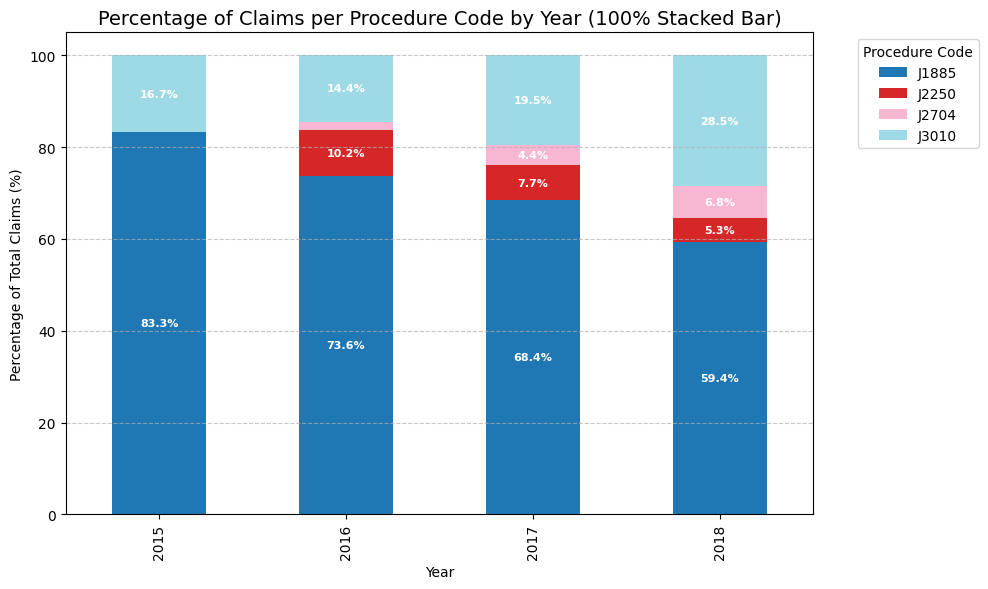

In [ ]:
# Step 1: Transpose the pivot_table so years become the x-axis
data = pivot_table.T

# Step 2: Normalize each column to get percentages (i.e., 100% stacking)
data_percent = data.div(data.sum(axis=1), axis=0) * 100

# Step 3: Plot the 100% stacked bar chart
ax = data_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Step 4: Add percentage labels
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 3:  # Avoid clutter: only show labels for >3%
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=8,
                color='white',
                fontweight='bold'
            )

# Step 5: Formatting the plot
plt.title('Percentage of Claims per Procedure Code by Year (100% Stacked Bar)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Percentage of Total Claims (%)')
plt.legend(title='Procedure Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


###Observation 1:

From the above stacked percentage bar graph we can see that both the competitor products are eating into the market of our Product 1 and the market share of Product 2 has been less and constantly decreasing from 2016 to 2018. While the Products 3 and 4 have been successful in increasing their market share on a y-o-y basis.

Claims by Patients per year

In [ ]:
# Step 1: Define the procedure codes you want to filter
selected_codes = ["J1885", "J2250", "J2704", "J3010"]

# Step 2: Filter the DataFrame for those procedure codes
filtered_df = medicare_filtered[medicare_filtered['Procedure_code'].isin(selected_codes)]

# Step 4: Group by procedure code and count unique HCPs
patient_counts = filtered_df.groupby('Procedure_code')['Patient_ID'].nunique()

# Year wise Patients distribution

# Convert to datetime if it's not already
filtered_df['Claim_Date'] = pd.to_datetime(filtered_df['Claim_Date'],errors='coerce')

# Extract year
filtered_df['Year'] = filtered_df['Claim_Date'].dt.year


# Group by Year, Procedure Code and Number of HCPs
yearly_distribution = filtered_df.groupby(['Year', 'Procedure_code']).agg(
    number_of_claims=('Patient_ID', 'count'),
    unique_patients=('Patient_ID', 'nunique')
).reset_index()

# Step 6: Show the output
print(yearly_distribution)


    Year Procedure_code  number_of_claims  unique_patients
0   2015          J1885                 5                5
1   2015          J3010                 1                1
2   2016          J1885              2892             1908
3   2016          J2250               395              365
4   2016          J2704                70               70
5   2016          J3010               562              502
6   2017          J1885              3381             2031
7   2017          J2250               379              364
8   2017          J2704               215              210
9   2017          J3010               960              809
10  2018          J1885              3052             1925
11  2018          J2250               272              256
12  2018          J2704               349              335
13  2018          J3010              1468             1184


<ipython-input-8-a6f5473f6e2b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Claim_Date'] = pd.to_datetime(filtered_df['Claim_Date'],errors='coerce')
<ipython-input-8-a6f5473f6e2b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Claim_Date'].dt.year



##Q1. 2) 2.	A 100% stacked bar graph showing the number of patients of each product per year, where one bar represents one year.

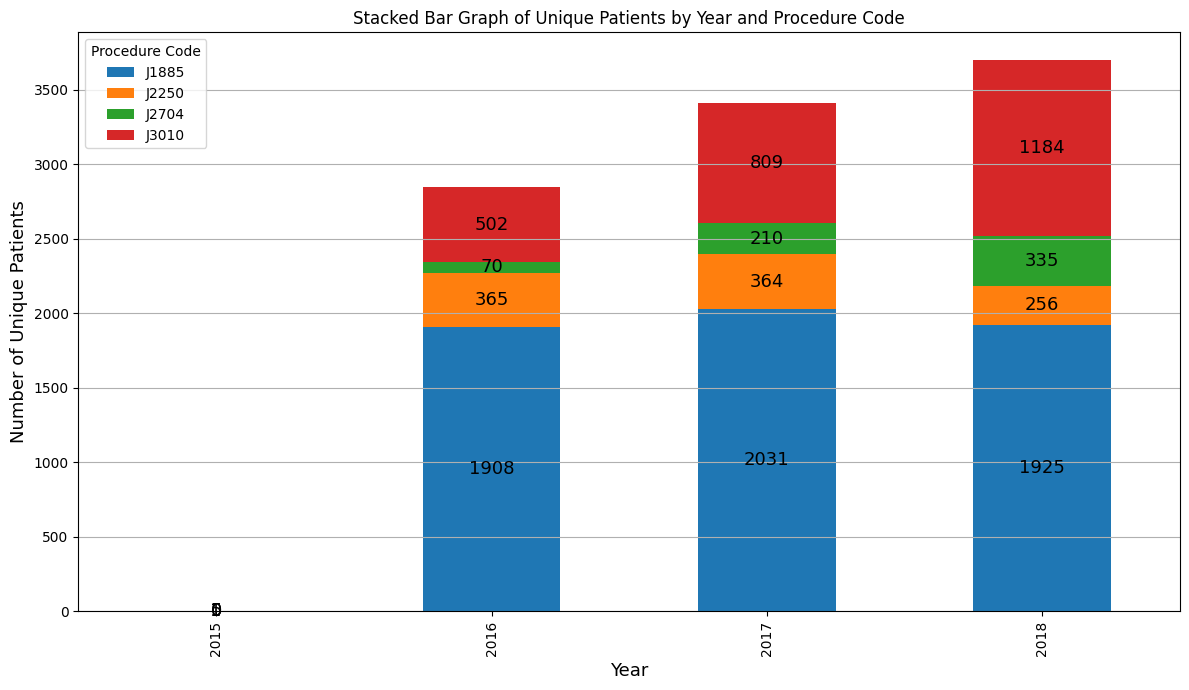

In [ ]:
#Group by Year and Procedure Code, counting unique HCPs (HCP_NPI_ID)
patient_counts = filtered_df.groupby(['Year', 'Procedure_code'])['Patient_ID'].nunique().unstack(fill_value=0)

# Plot stacked bar graph
ax = patient_counts.plot(kind='bar', stacked=True, figsize=(12, 7))

# Title and labels
plt.title('Stacked Bar Graph of Unique Patients by Year and Procedure Code')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Number of Unique Patients',fontsize = 13)
plt.legend(title='Procedure Code')
plt.grid(axis='y')
plt.tight_layout()

# Step 7: Add labels inside each stacked division
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=13, color='black')

plt.show()

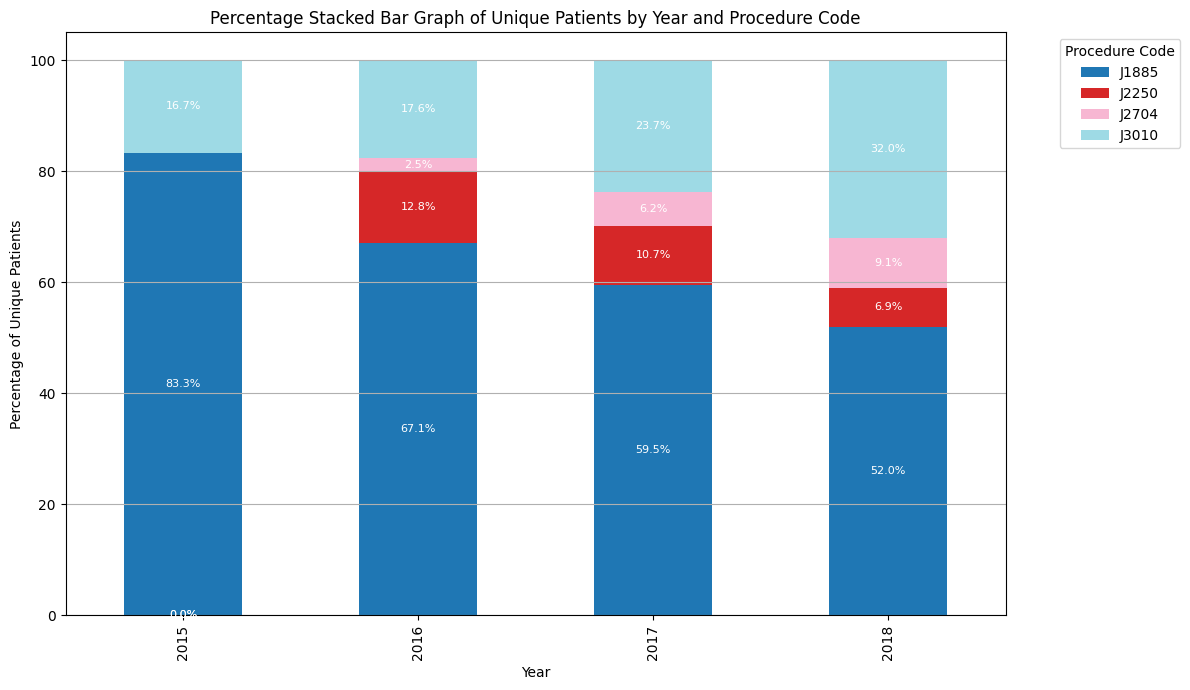

In [ ]:
import matplotlib.pyplot as plt

# Group by Year and Procedure Code, counting unique Patients
patient_counts = filtered_df.groupby(['Year', 'Procedure_code'])['Patient_ID'].nunique().unstack(fill_value=0)

# Convert counts to percentages row-wise
patient_percentages = patient_counts.div(patient_counts.sum(axis=1), axis=0) * 100

# Plot stacked percentage bar chart
ax = patient_percentages.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

# Titles and labels
plt.title('Percentage Stacked Bar Graph of Unique Patients by Year and Procedure Code')
plt.xlabel('Year')
plt.ylabel('Percentage of Unique Patients')
plt.legend(title='Procedure Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()

# Add percentage labels inside each stacked division
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8, color='white')

plt.show()


In [ ]:
patient_counts = filtered_df['Patient_ID'].nunique()
patient_counts

3690

###Observation 2:

From the above graph we can see that the number of patients to whom the Product 1 has been the highest in all the years. Where as the number of patients to whom Product 2 was recommended has been been decreasing over the years contrary to the fact that both our competitors have seen a tremendous growth in the number of patients to whom the product was prescribed.

####Filtering only for the 4 competitor products

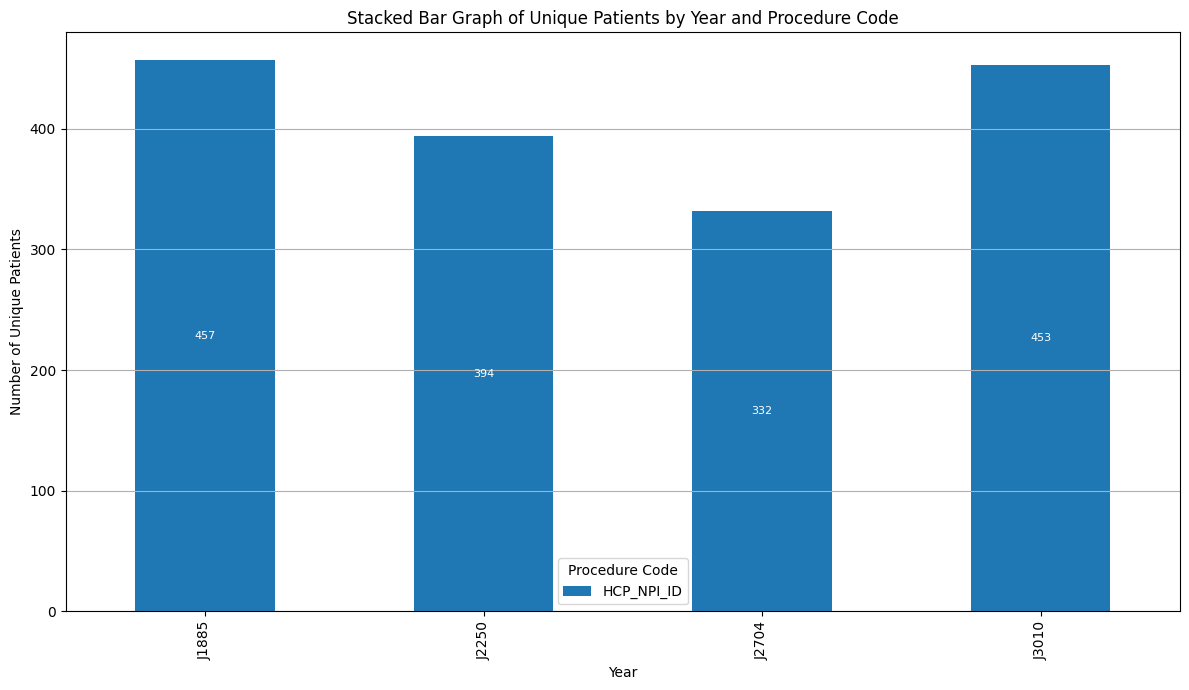

In [ ]:
# Step 1: Define the procedure codes you want to filter
selected_codes = ["J1885", "J2250", "J2704", "J3010"]

# Step 2: Filter the DataFrame for those procedure codes
filtered_df = medicare_filtered[medicare_filtered['Procedure_code'].isin(selected_codes)]

# Step 4: Group by procedure code and count unique HCPs
hcp_counts = filtered_df.groupby('Procedure_code')['HCP_NPI_ID'].nunique()

# Plot stacked bar graph
ax = hcp_counts.plot(kind='bar',figsize=(12, 7))

# Title and labels
plt.title('Stacked Bar Graph of Unique Patients by Year and Procedure Code')
plt.xlabel('Year')
plt.ylabel('Number of Unique Patients')
plt.legend(title='Procedure Code')
plt.grid(axis='y')
plt.tight_layout()

# Step 7: Add labels inside each stacked division
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='white')

plt.show()


Claims by HCP per year

In [ ]:
# Year wise HCP distribution

# Convert to datetime if it's not already
filtered_df['Claim_Date'] = pd.to_datetime(filtered_df['Claim_Date'],errors='coerce')

# Extract year
filtered_df['Year'] = filtered_df['Claim_Date'].dt.year


# Group by Year, Procedure Code and Number of HCPs
yearly_distribution = filtered_df.groupby(['Year', 'Procedure_code']).agg(
    number_of_claims=('HCP_NPI_ID', 'count'),
    unique_hcps=('HCP_NPI_ID', 'nunique')
).reset_index()

# Step 6: Show the output
print(yearly_distribution)

    Year Procedure_code  number_of_claims  unique_hcps
0   2015          J1885                 5            5
1   2015          J3010                 1            1
2   2016          J1885              2892          450
3   2016          J2250               395          261
4   2016          J2704                70           64
5   2016          J3010               562          315
6   2017          J1885              3381          453
7   2017          J2250               379          255
8   2017          J2704               215          169
9   2017          J3010               960          384
10  2018          J1885              3052          454
11  2018          J2250               272          206
12  2018          J2704               349          241
13  2018          J3010              1468          428


<ipython-input-13-8c23aef35e44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Claim_Date'] = pd.to_datetime(filtered_df['Claim_Date'],errors='coerce')
<ipython-input-13-8c23aef35e44>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Claim_Date'].dt.year


##Q1.a. 3) 3.	A 100% stacked bar graph showing the number of HCPs (I.e., writers) writing claims for each product per year, where one bar represents one year.

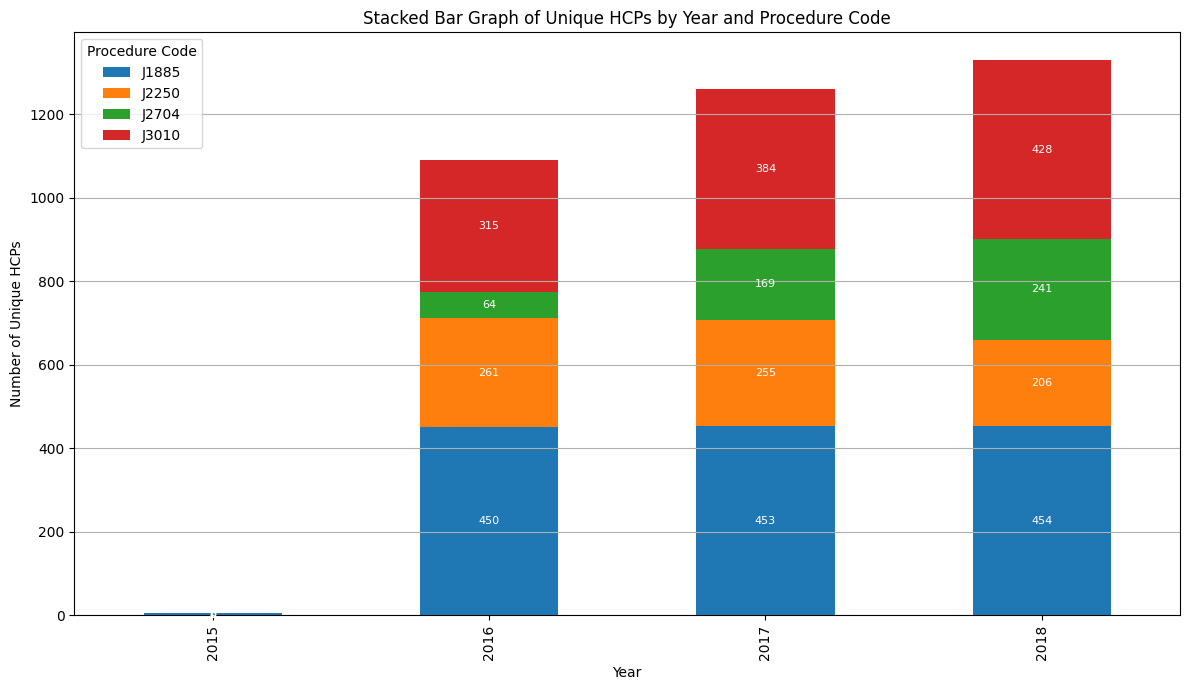

In [ ]:
#Group by Year and Procedure Code, counting unique HCPs (HCP_NPI_ID)
hcp_counts = filtered_df.groupby(['Year', 'Procedure_code'])['HCP_NPI_ID'].nunique().unstack(fill_value=0)

# Plot stacked bar graph
ax = hcp_counts.plot(kind='bar', stacked=True, figsize=(12, 7))

# Title and labels
plt.title('Stacked Bar Graph of Unique HCPs by Year and Procedure Code')
plt.xlabel('Year')
plt.ylabel('Number of Unique HCPs')
plt.legend(title='Procedure Code')
plt.grid(axis='y')
plt.tight_layout()

# Step 7: Add labels inside each stacked division
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='white')

plt.show()


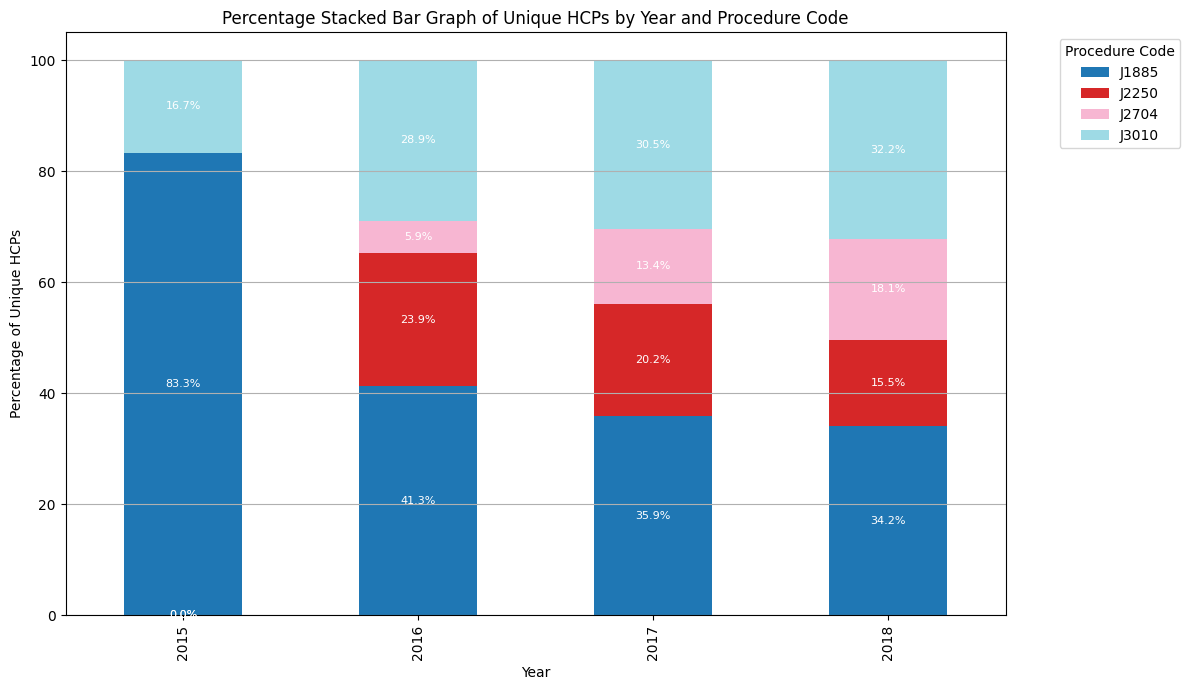

In [ ]:
import matplotlib.pyplot as plt

# Group by Year and Procedure Code, counting unique HCPs
hcp_counts = filtered_df.groupby(['Year', 'Procedure_code'])['HCP_NPI_ID'].nunique().unstack(fill_value=0)

# Convert counts to percentages row-wise
hcp_percentages = hcp_counts.div(hcp_counts.sum(axis=1), axis=0) * 100

# Plot stacked percentage bar chart
ax = hcp_percentages.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

# Titles and labels
plt.title('Percentage Stacked Bar Graph of Unique HCPs by Year and Procedure Code')
plt.xlabel('Year')
plt.ylabel('Percentage of Unique HCPs')
plt.legend(title='Procedure Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()

# Add percentage labels inside each stacked division
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8, color='white')

plt.show()


###

Observation 3:

For the above 3 graphs we can observe that the number of HCPs for the Product 1 are constant, where as the number of HCPs prescribing our Product 2 are decresing. This market is taken over by Product 3 and Product 4. The number if HCPs prescribing Product 4 has increased almost 4 times in year 2018 compared to year 2016. While the number of HCPs prescribing product 3 have gone up from 315 in year 2016 to 428 in year 2018.  

Q1. b. 1.	A line graph showing the number of claims per writer per year, where one line represents one product, and one set of vertical data points are for one year.

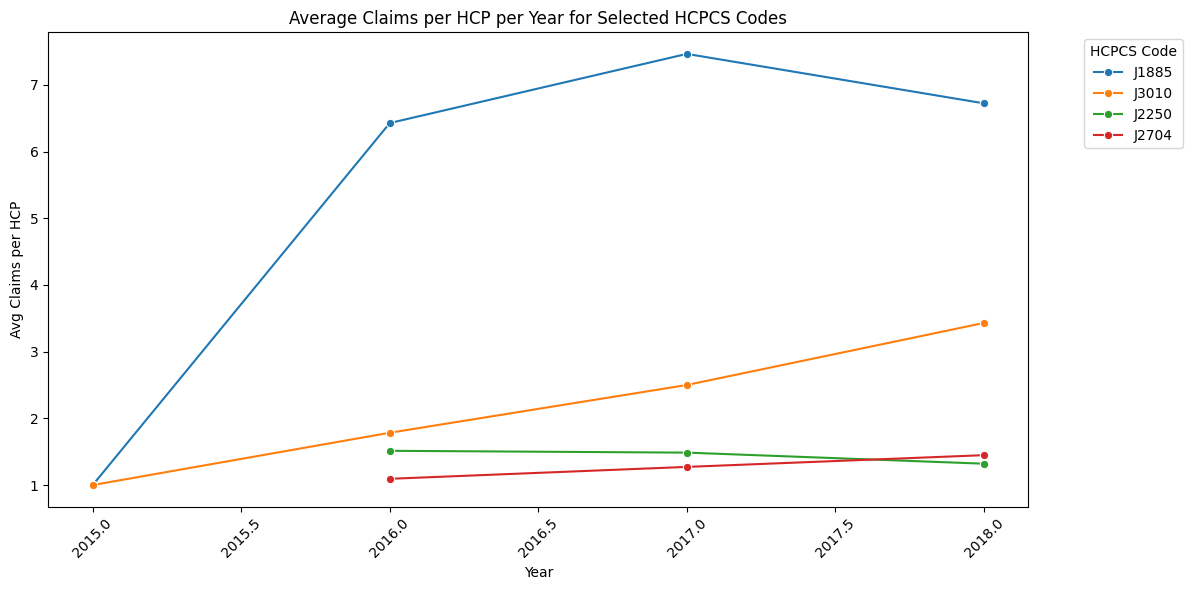

    Year Procedure_code  Claim_ID
0   2015          J1885      1.00
1   2015          J3010      1.00
2   2016          J1885      6.43
3   2016          J2250      1.51
4   2016          J2704      1.09
5   2016          J3010      1.78
6   2017          J1885      7.46
7   2017          J2250      1.49
8   2017          J2704      1.27
9   2017          J3010      2.50
10  2018          J1885      6.72
11  2018          J2250      1.32
12  2018          J2704      1.45
13  2018          J3010      3.43


In [ ]:
# Group by year, HCP (writer), and HCPCS code, then count claims
claims_per_hcp = filtered_df.groupby(['Year', 'HCP_NPI_ID', 'Procedure_code'])['Claim_ID'].count().reset_index()


# Average number of claims per HCP per year per HCPCS code
avg_claims = claims_per_hcp.groupby(['Year', 'Procedure_code'])['Claim_ID'].mean().reset_index()

# Plot line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_claims, x='Year', y='Claim_ID', hue='Procedure_code', marker='o')
plt.title('Average Claims per HCP per Year for Selected HCPCS Codes')
plt.xlabel('Year')
plt.ylabel('Avg Claims per HCP')
plt.legend(title='HCPCS Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show final table of average claims
print(avg_claims.round(2))

Q1.b.2) 2.	A line graph showing the number of patients per writer per year, where one line represents one product, and one set of vertical data points are for one year.

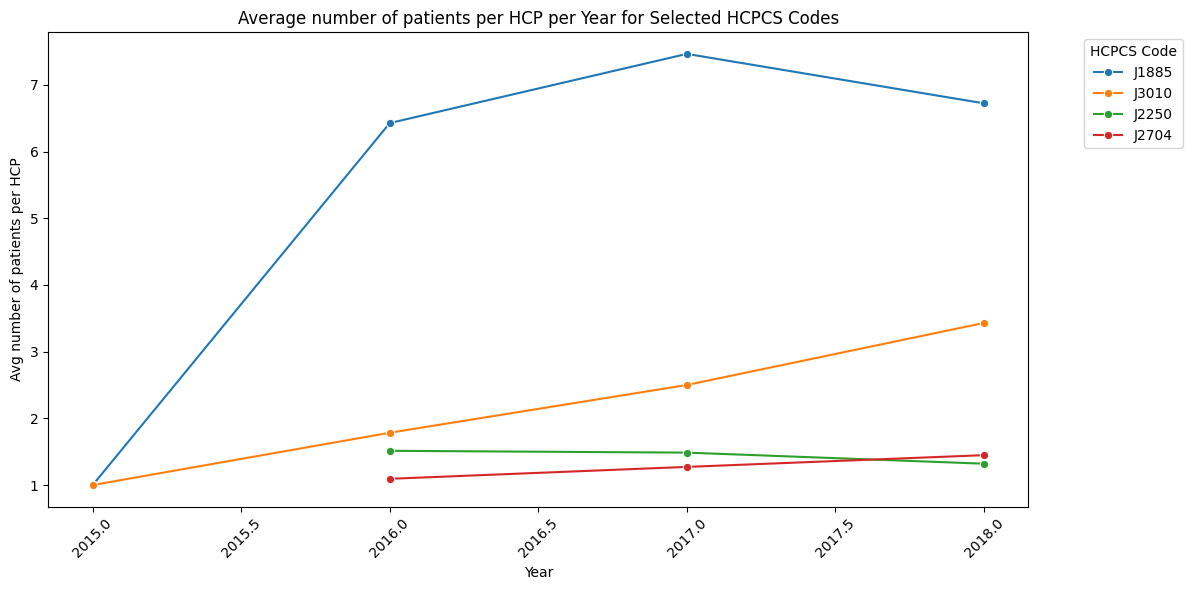

    Year Procedure_code  Claim_ID
0   2015          J1885      1.00
1   2015          J3010      1.00
2   2016          J1885      6.43
3   2016          J2250      1.51
4   2016          J2704      1.09
5   2016          J3010      1.78
6   2017          J1885      7.46
7   2017          J2250      1.49
8   2017          J2704      1.27
9   2017          J3010      2.50
10  2018          J1885      6.72
11  2018          J2250      1.32
12  2018          J2704      1.45
13  2018          J3010      3.43


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Group by year, HCP (writer), and HCPCS code, then count patients
patients_per_hcp = filtered_df.groupby(['Year', 'HCP_NPI_ID', 'Procedure_code'])['Patient_ID'].count().reset_index()


# Average number of claims per HCP per year per HCPCS code
avg_patients_per_hcp = patients_per_hcp.groupby(['Year', 'Procedure_code'])['Patient_ID'].mean().reset_index()

# Plot line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_patients_per_hcp, x='Year', y='Patient_ID', hue='Procedure_code', marker='o')
plt.title('Average number of patients per HCP per Year for Selected HCPCS Codes')
plt.xlabel('Year')
plt.ylabel('Avg number of patients per HCP')
plt.legend(title='HCPCS Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show final table of average claims
print(avg_claims.round(2))


# **Observation:**

1. We can see that the avg claims per hcp and avg patients per hcp are equal. Which means that each HCP is writing only 1 claim per patient.

2. Across the four selected HCPCS codes, J1885 consistently had the highest average number of claims and unique patients per HCP each year, indicating it is the most commonly used product among providers.

3. J3010 and J2250 followed, showing moderate usage, while J2704 had the lowest interaction levels.

4. Trends over the years showed relative stability or growth for all codes, but Product 2 trends have declined over the years.

#**Recommendations:**

1. To boost canalization of J1885 consider targeted engagement with HCPs who are already high prescribers of J1885, as they are more receptive to similar therapies.

2. Educational campaigns, clinical training, and comparative case studies could highlight the effectiveness and benefits of Product 2 over Product 1.

3. Offering promotional incentives, simplifying access, and ensuring strong supply chain availability can further support adoption.

4. Monitoring regional trends can also help direct field force efforts where each product has growth potential.

### Q1. c. i.	Find the territory-level claims volume per product per year.

In [ ]:
print(filtered_df.columns.tolist())

['Claim_ID', 'Patient_ID', 'HCP_NPI_ID', 'Claim_Date', 'Procedure_code', 'Amt_paid_by_insurer', 'diagnosis_code', 'claim_cost', 'City', 'State', 'ZIP Code', 'Specialty', 'Age', 'Gender', 'Territory Name', 'Region Name', 'Diagnosis_Code_Mapping_Data', 'Year']


In [ ]:
import pandas as pd

# Group by 'Territory Name', 'Procedure_code', and 'Year', then count unique Claim_IDs
territory_claims_summary = filtered_df.groupby(['Territory Name', 'Procedure_code', 'Year'])['Claim_ID'].nunique().reset_index()

# Rename the count column for clarity
territory_claims_summary.rename(columns={'Claim_ID': 'Total_Claims'}, inplace=True)

# Display the result
print(territory_claims_summary)


       Territory Name Procedure_code  Year  Total_Claims
0          Albany, NY          J1885  2016           127
1          Albany, NY          J1885  2017           157
2          Albany, NY          J1885  2018           137
3          Albany, NY          J2250  2016            14
4          Albany, NY          J2250  2017            20
..                ...            ...   ...           ...
250  Washington, D.C.          J2704  2017            17
251  Washington, D.C.          J2704  2018            15
252  Washington, D.C.          J3010  2016            28
253  Washington, D.C.          J3010  2017            66
254  Washington, D.C.          J3010  2018            77

[255 rows x 4 columns]


In [ ]:
import pandas as pd

# Group by 'Territory Name', 'Procedure_code', and 'Year', then count unique Claim_IDs
territory_claims_summary = filtered_df.groupby(['City','ZIP Code','Procedure_code', 'Year'])['Claim_ID'].nunique().reset_index()

# Rename the count column for clarity
territory_claims_summary.rename(columns={'Claim_ID': 'Total_Claims'}, inplace=True)

# Display the result
print(territory_claims_summary)


                City  ZIP Code Procedure_code  Year  Total_Claims
0     Aguilarborough     76680          J1885  2016             6
1     Aguilarborough     76680          J1885  2017             7
2     Aguilarborough     76680          J1885  2018             7
3     Aguilarborough     76680          J2250  2016             1
4     Aguilarborough     76680          J2250  2017             1
...              ...       ...            ...   ...           ...
3681       Woodburgh     32128          J2250  2017             3
3682       Woodburgh     32128          J2704  2018             1
3683       Woodburgh     32128          J3010  2016             3
3684       Woodburgh     32128          J3010  2017             6
3685       Woodburgh     32128          J3010  2018             1

[3686 rows x 5 columns]


In [ ]:
# Filter for Procedure_code J2250
filtered_df_J2250 = filtered_df[filtered_df['Procedure_code'] == 'J2250']

# Group by Territory Name only, then count Claim_IDs
claims_by_territory = (
    filtered_df_J2250
    .groupby('Territory Name')['Claim_ID']
    .count()
    .reset_index(name='Number_of_Claims')
    .sort_values(by='Number_of_Claims', ascending=False)
)


print(claims_by_territory)


      Territory Name  Number_of_Claims
3         Boston, MA                92
14       Orlando, FL                84
11  LA-San Diego, CA                83
13      New York, NY                81
15  Philedelphia, PA                75
20  Washington, D.C.                69
17      San Jose, CA                66
7         Dallas, TX                61
0         Albany, NY                53
10       Houston, TX                52
8         Denver, CO                46
18       Seattle, WA                46
1        Atlanta, GA                41
19      St Louis, MO                33
5        Chicago, IL                32
6     Cincinnati, OH                30
16       Phoenix, AZ                24
9        Detroit, MI                23
4      Charlotte, NC                19
12   Minneapolis, MN                19
2     Birmingham, AL                17


####Observation:

1. From the above table we see can see that the number of claims for J2250 is highest for Boston, Orlando, LA-San Diego, New York, Philedelphia.

In [ ]:

# Filter for Procedure_code J3010
filtered_df_J3010 = filtered_df[filtered_df['Procedure_code'] == 'J3010']

# Group by Territory Name only, then count Claim_IDs
claims_by_territory = (
    filtered_df_J3010
    .groupby('Territory Name')['Claim_ID']
    .count()
    .reset_index(name='Number_of_Claims')
    .sort_values(by='Number_of_Claims', ascending=False)
)

# Display result
print(claims_by_territory)


      Territory Name  Number_of_Claims
13      New York, NY               268
14       Orlando, FL               245
11  LA-San Diego, CA               240
3         Boston, MA               229
15  Philedelphia, PA               186
17      San Jose, CA               177
20  Washington, D.C.               171
7         Dallas, TX               163
8         Denver, CO               160
18       Seattle, WA               153
10       Houston, TX               144
0         Albany, NY               142
1        Atlanta, GA               119
5        Chicago, IL               105
19      St Louis, MO               100
6     Cincinnati, OH                88
9        Detroit, MI                71
4      Charlotte, NC                65
16       Phoenix, AZ                62
2     Birmingham, AL                53
12   Minneapolis, MN                50


###Observation:
1. From the above table we see can see that the number of claims for J3010 is highest for New York, Orlando, LA-San Diego, Boston, Philedelphia.

In [ ]:
# Filter for Procedure_code 2704
filtered_df_J3010 = filtered_df[filtered_df['Procedure_code'] == 'J2704']

# Group by Territory Name only, then count Claim_IDs
claims_by_territory = (
    filtered_df_J3010
    .groupby('Territory Name')['Claim_ID']
    .count()
    .reset_index(name='Number_of_Claims')
    .sort_values(by='Number_of_Claims', ascending=False)
)

# Display result
print(claims_by_territory)

      Territory Name  Number_of_Claims
13      New York, NY                57
11  LA-San Diego, CA                53
3         Boston, MA                53
14       Orlando, FL                46
17      San Jose, CA                43
15  Philedelphia, PA                42
20  Washington, D.C.                38
0         Albany, NY                38
10       Houston, TX                32
7         Dallas, TX                32
18       Seattle, WA                29
8         Denver, CO                27
6     Cincinnati, OH                23
1        Atlanta, GA                22
19      St Louis, MO                19
5        Chicago, IL                16
4      Charlotte, NC                16
9        Detroit, MI                14
2     Birmingham, AL                13
12   Minneapolis, MN                12
16       Phoenix, AZ                 9


In [ ]:
# Filter for Procedure_code J1885
filtered_df_J3010 = filtered_df[filtered_df['Procedure_code'] == 'J1885']

# Group by Territory Name only, then count Claim_IDs
claims_by_territory = (
    filtered_df_J3010
    .groupby('Territory Name')['Claim_ID'].nunique()
 #   .count()
    .reset_index(name='Number_of_Claims')
    .sort_values(by='Number_of_Claims', ascending=False)
)

# Display result
print(claims_by_territory)

      Territory Name  Number_of_Claims
13      New York, NY               841
11  LA-San Diego, CA               806
3         Boston, MA               684
14       Orlando, FL               659
17      San Jose, CA               605
15  Philedelphia, PA               587
20  Washington, D.C.               546
7         Dallas, TX               482
18       Seattle, WA               460
10       Houston, TX               436
8         Denver, CO               432
0         Albany, NY               420
1        Atlanta, GA               400
6     Cincinnati, OH               309
5        Chicago, IL               302
19      St Louis, MO               270
4      Charlotte, NC               265
9        Detroit, MI               254
16       Phoenix, AZ               223
12   Minneapolis, MN               182
2     Birmingham, AL               136


####Observation:
An analysis of claims data across all four anesthesia products (J2250, J3010, J2704, J1885) indicates that the following seven territories consistently exhibit the highest sales volumes:

1. Boston, MA

2. Los Angeles–San Diego, CA

3. New York, NY

4. Orlando, FL

5. Philadelphia, PA

6. Washington, D.C.

7. San Jose, CA

#### Strategic Implication:

These territories represent high-demand markets for anesthesia products and are likely to offer the greatest commercial opportunity. As such, they should be prioritized as primary targets for the rollout and sales efforts of Product 2 (J2250), to maximize early market penetration and revenue impact.

In [ ]:
# Define the target territories and procedure codes
target_territories = ['New York, NY', 'Orlando, FL', 'LA-San Diego, CA', 'Boston, MA', 'Philedelphia, PA']
target_procedures = ['J2250', 'J3010']

# Filter the DataFrame for the selected territories and procedure codes
filtered_df_territory = filtered_df[
    (filtered_df['Territory Name'].isin(target_territories)) &
    (filtered_df['Procedure_code'].isin(target_procedures))
]

# Group by Territory Name and Procedure_code and count the claims
claims_volume = (
    filtered_df_territory
    .groupby(['Territory Name', 'Procedure_code'])['Claim_ID']
    .count()
    .reset_index(name='Number_of_Claims')
)

# Pivot for easier plotting
pivot_df = claims_volume.pivot(index='Territory Name', columns='Procedure_code', values='Number_of_Claims').fillna(0)

# Plotting
#pivot_df.plot(kind='bar', figsize=(12, 7), color=['skyblue', 'salmon'])
#plt.title('Total Claim Volume for all years by Territory for J2250 and J3010')
#plt.xlabel('Territory Name')
#plt.ylabel('Number of Claims')
#plt.xticks(rotation=45)
#plt.legend(title='Procedure Code')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()

#plt.show()




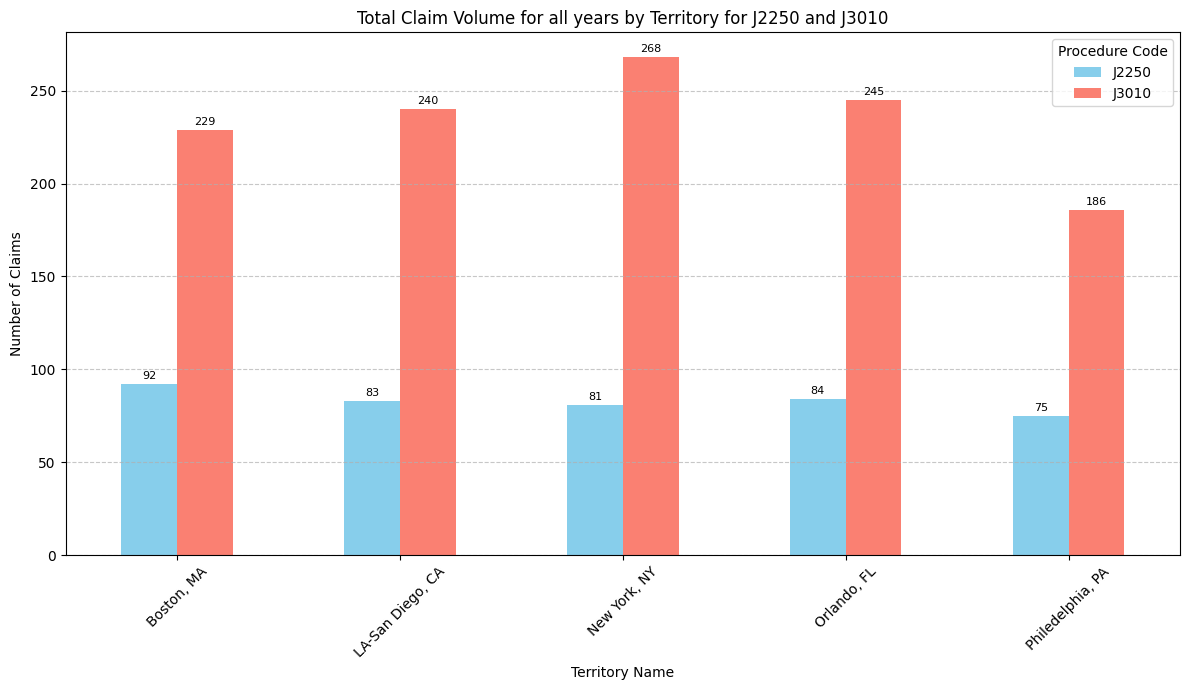

In [ ]:
# Plotting
ax = pivot_df.plot(kind='bar', figsize=(12, 7), color=['skyblue', 'salmon'])
plt.title('Total Claim Volume for all years by Territory for J2250 and J3010')
plt.xlabel('Territory Name')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.legend(title='Procedure Code')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add compact labels above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, padding=2, rotation=0)

plt.show()


###Observation:
1. The 5 markets with the highest sale for both the products is same.



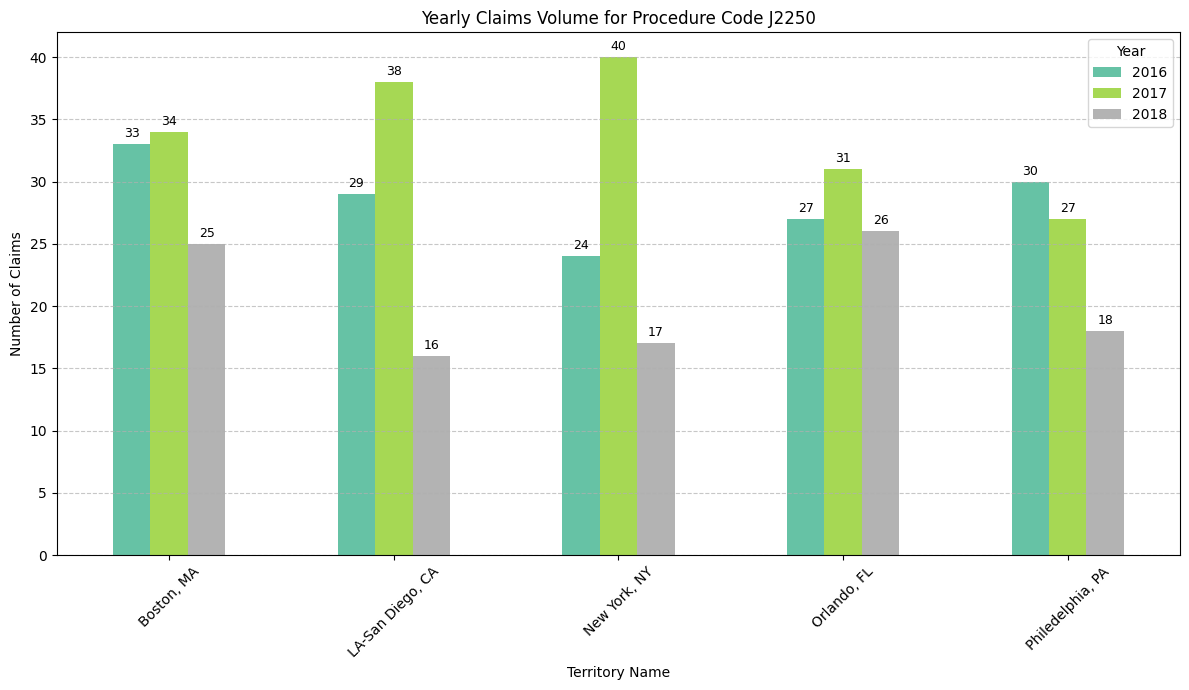

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the target territories and procedure code
target_territories = ['New York, NY', 'Orlando, FL', 'LA-San Diego, CA', 'Boston, MA', 'Philedelphia, PA']
target_years = [2016, 2017, 2018]
procedure_code = 'J2250'

# Filter the DataFrame
filtered_df_territory_year_J2250 = filtered_df[
    (filtered_df['Territory Name'].isin(target_territories)) &
    (filtered_df['Year'].isin(target_years)) &
    (filtered_df['Procedure_code'] == procedure_code)
]

# Group by Territory and Year, count Claim_IDs
claims_per_year = (
    filtered_df_territory_year_J2250
    .groupby(['Territory Name', 'Year'])['Claim_ID']
    .count()
    .reset_index(name='Number_of_Claims')
)

# Pivot for easier plotting
pivot_df = claims_per_year.pivot(index='Territory Name', columns='Year', values='Number_of_Claims').fillna(0)

# Plotting
ax = pivot_df.plot(kind='bar', figsize=(12, 7), colormap='Set2')
plt.title(f'Yearly Claims Volume for Procedure Code {procedure_code}')
plt.xlabel('Territory Name')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add labels on top of bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

plt.show()


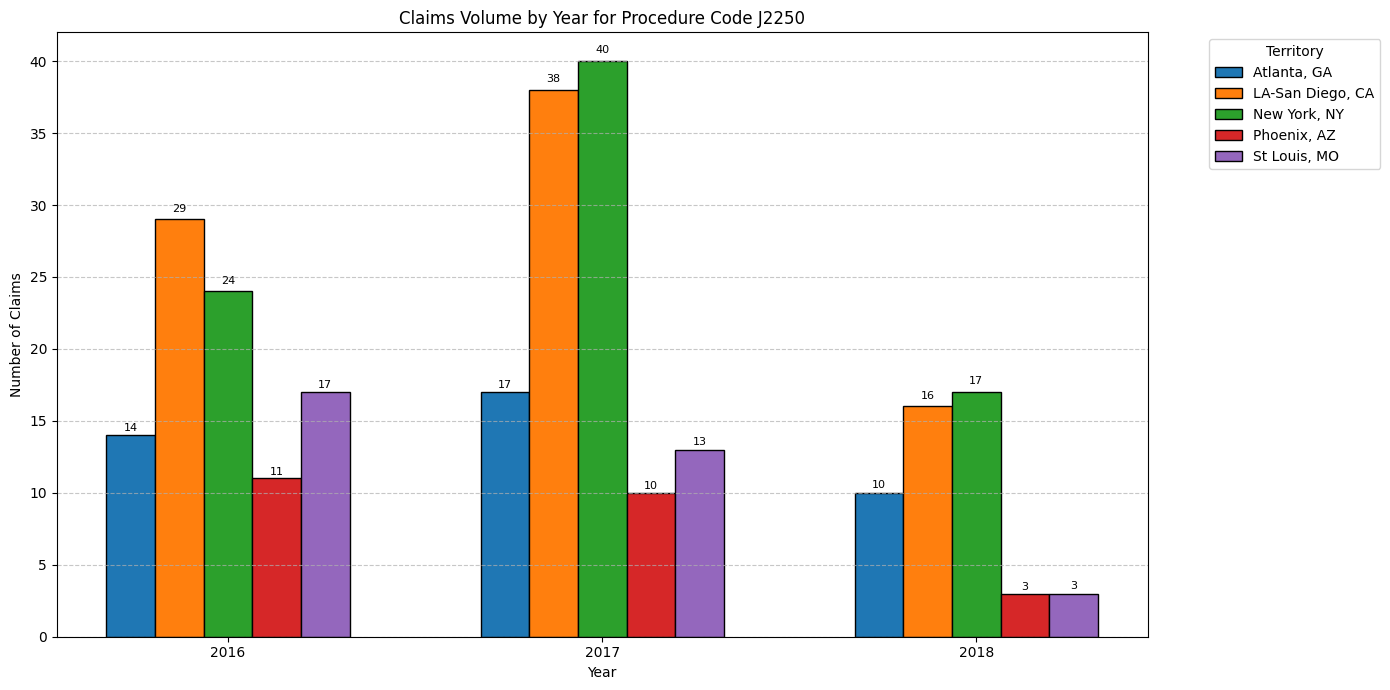

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the target territories, years, and procedure code
target_territories = ['St Louis, MO', 'Phoenix, AZ', 'LA-San Diego, CA', 'New York, NY', 'Atlanta, GA']
target_years = [2016, 2017, 2018]
procedure_code = 'J2250'

# Filter the DataFrame
filtered_df_territory_year_J2250 = filtered_df[
    (filtered_df['Territory Name'].isin(target_territories)) &
    (filtered_df['Year'].isin(target_years)) &
    (filtered_df['Procedure_code'] == procedure_code)
]

# Group and pivot data
claims_per_year = (
    filtered_df_territory_year_J2250
    .groupby(['Year', 'Territory Name'])['Claim_ID']
    .count()
    .reset_index(name='Number_of_Claims')
)

pivot_df = claims_per_year.pivot(index='Year', columns='Territory Name', values='Number_of_Claims').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

territories = pivot_df.columns.tolist()
years = pivot_df.index.tolist()
x = np.arange(len(years))
bar_width = 0.13

# Color map (consistent and distinguishable)
colors = plt.get_cmap('tab10').colors

for i, territory in enumerate(territories):
    values = pivot_df[territory].values
    bar_positions = x + (i - len(territories)/2) * bar_width + bar_width / 2
    bars = ax.bar(bar_positions, values, width=bar_width, label=territory, color=colors[i % len(colors)], edgecolor='black')

    # Add text labels
    for xpos, val in zip(bar_positions, values):
        ax.text(xpos, val + max(values) * 0.01, f'{int(val)}', ha='center', va='bottom', fontsize=8)

# Axis setup
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Claims')
ax.set_title(f'Claims Volume by Year for Procedure Code {procedure_code}')
ax.legend(title='Territory', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


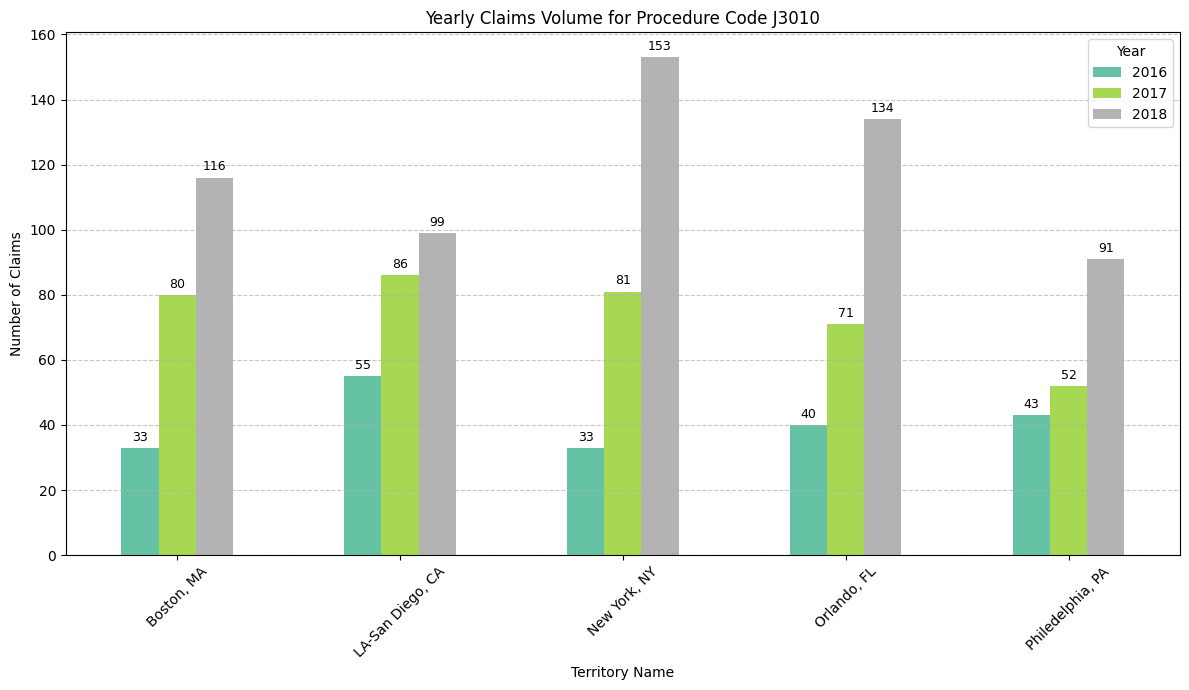

In [ ]:
# Define the target territories and procedure code
target_territories = ['New York, NY', 'Orlando, FL', 'LA-San Diego, CA', 'Boston, MA', 'Philedelphia, PA']
target_years = [2016, 2017, 2018]
procedure_code = 'J3010'

# Filter the DataFrame
filtered_df_territory_year_J3010 = filtered_df[
    (filtered_df['Territory Name'].isin(target_territories)) &
    (filtered_df['Year'].isin(target_years)) &
    (filtered_df['Procedure_code'] == procedure_code)
]

# Group by Territory and Year, count Claim_IDs
claims_per_year_J3010 = (
    filtered_df_territory_year_J3010
    .groupby(['Territory Name', 'Year'])['Claim_ID']
    .count()
    .reset_index(name='Number_of_Claims')
)

# Pivot for easier plotting
pivot_df = claims_per_year_J3010.pivot(index='Territory Name', columns='Year', values='Number_of_Claims').fillna(0)

# Plotting
ax = pivot_df.plot(kind='bar', figsize=(12, 7), colormap='Set2')
plt.title(f'Yearly Claims Volume for Procedure Code {procedure_code}')
plt.xlabel('Territory Name')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add labels on top of bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

plt.show()


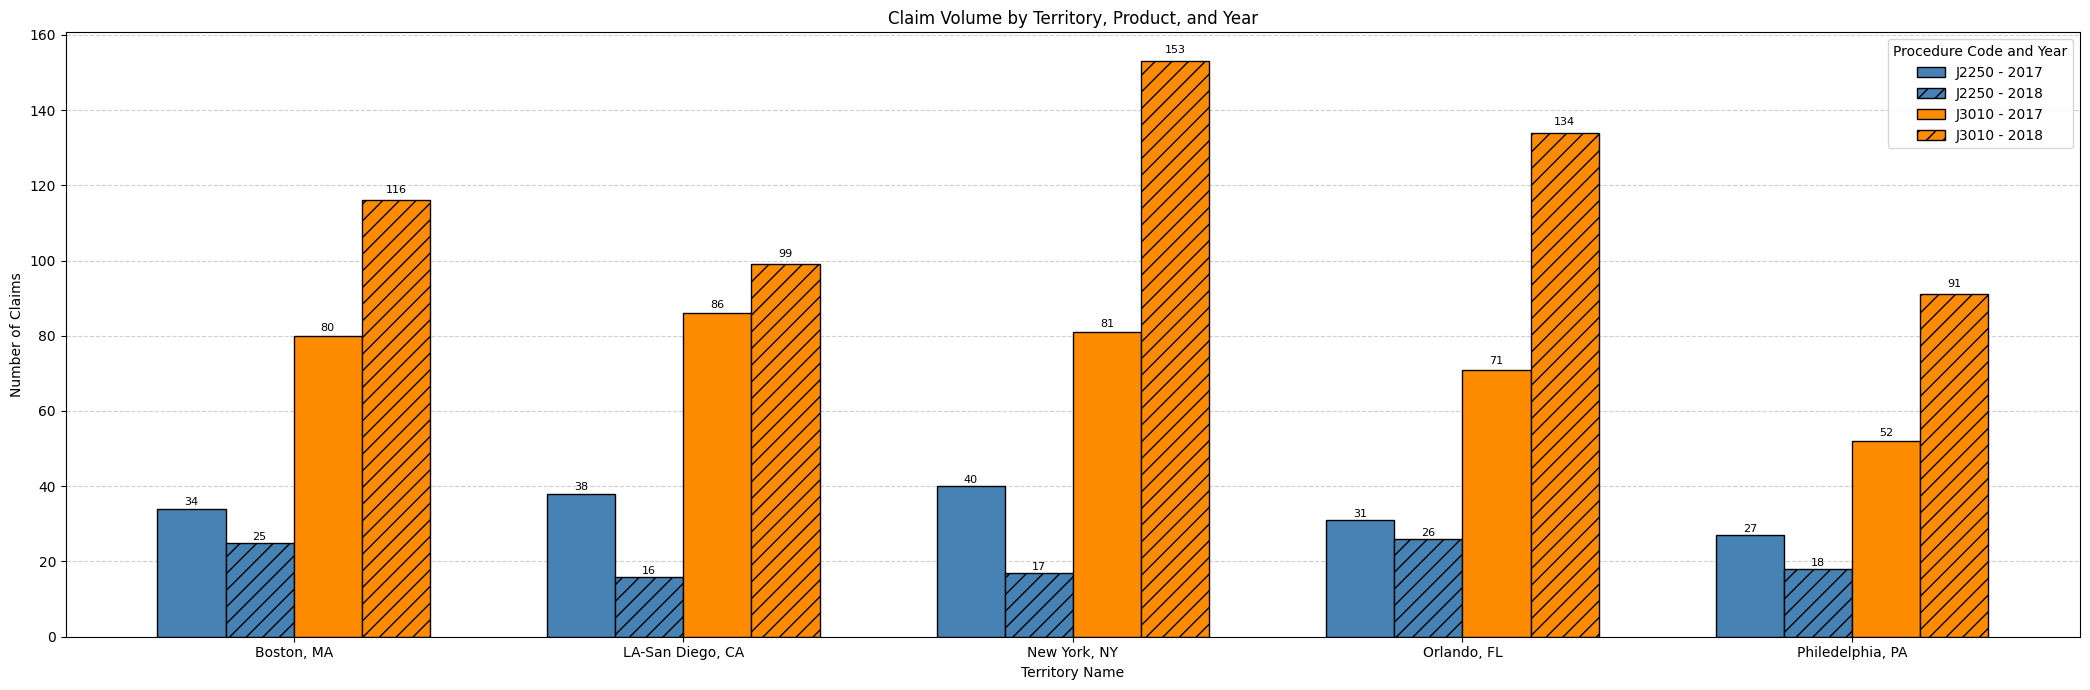

In [ ]:
# Define the target territories, years, and procedure codes
target_territories = ['New York, NY', 'Orlando, FL', 'LA-San Diego, CA', 'Boston, MA', 'Philedelphia, PA']
target_years = [2017, 2018]
target_procedures = ['J2250', 'J3010']

grouped_df = (
    filtered_df[
        (filtered_df['Territory Name'].isin(target_territories)) &
        (filtered_df['Procedure_code'].isin(target_procedures)) &
        (filtered_df['Year'].isin(target_years))  # Add a 'Claim_Year' column if not already there
    ]
    .groupby(['Territory Name', 'Procedure_code', 'Year'])['Claim_ID']
    .count()
    .reset_index(name='Number_of_Claims')
)

pivot_df = grouped_df.pivot_table(
    index=['Territory Name', 'Procedure_code'],
    columns='Year',
    values='Number_of_Claims',
    fill_value=0
)

import numpy as np
import matplotlib.pyplot as plt

# Assuming pivot_df is already created and looks like:
# Multi-indexed with ['Territory Name', 'Procedure_code'], columns = [2017, 2018]
pivot_df = pivot_df.reset_index()

# Set X-axis base
territories = pivot_df['Territory Name'].unique()
x = np.arange(len(territories))

# Bar width definitions
width = 0.35
sub_width = width / 2

# Colors by product
product_colors = {
    'J2250': 'steelblue',
    'J3010': 'darkorange',

}

# Hatch styles by year
year_hatches = {
    2017: '',
    2018: '//'
}

fig, ax = plt.subplots(figsize=(21, 7))

for i, procedure in enumerate(target_procedures):
    for j, year in enumerate([2017, 2018]):
        subset = pivot_df[pivot_df['Procedure_code'] == procedure]
        bar_positions = x + (i - 0.5) * width + (j - 0.5) * sub_width
        values = subset[year]

        # Plot bar with color + hatch
        bars = ax.bar(
            bar_positions,
            values,
            width=sub_width,
            label=f'{procedure} - {year}',
            color=product_colors[procedure],
            hatch=year_hatches[year],
            edgecolor='black',
            zorder=2  # Ensures bars are above grid lines
        )

        # Add text labels above each bar
        for xpos, val in zip(bar_positions, values):
            ax.text(
                xpos,
                val + max(values) * 0.01,
                f'{int(val)}',
                ha='center',
                va='bottom',
                fontsize=8
            )

# X-axis setup
ax.set_xticks(x)
ax.set_xticklabels(territories, rotation=0)
ax.set_xlabel('Territory Name')
ax.set_ylabel('Number of Claims')
ax.set_title('Claim Volume by Territory, Product, and Year')
ax.legend(title='Procedure Code and Year')
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


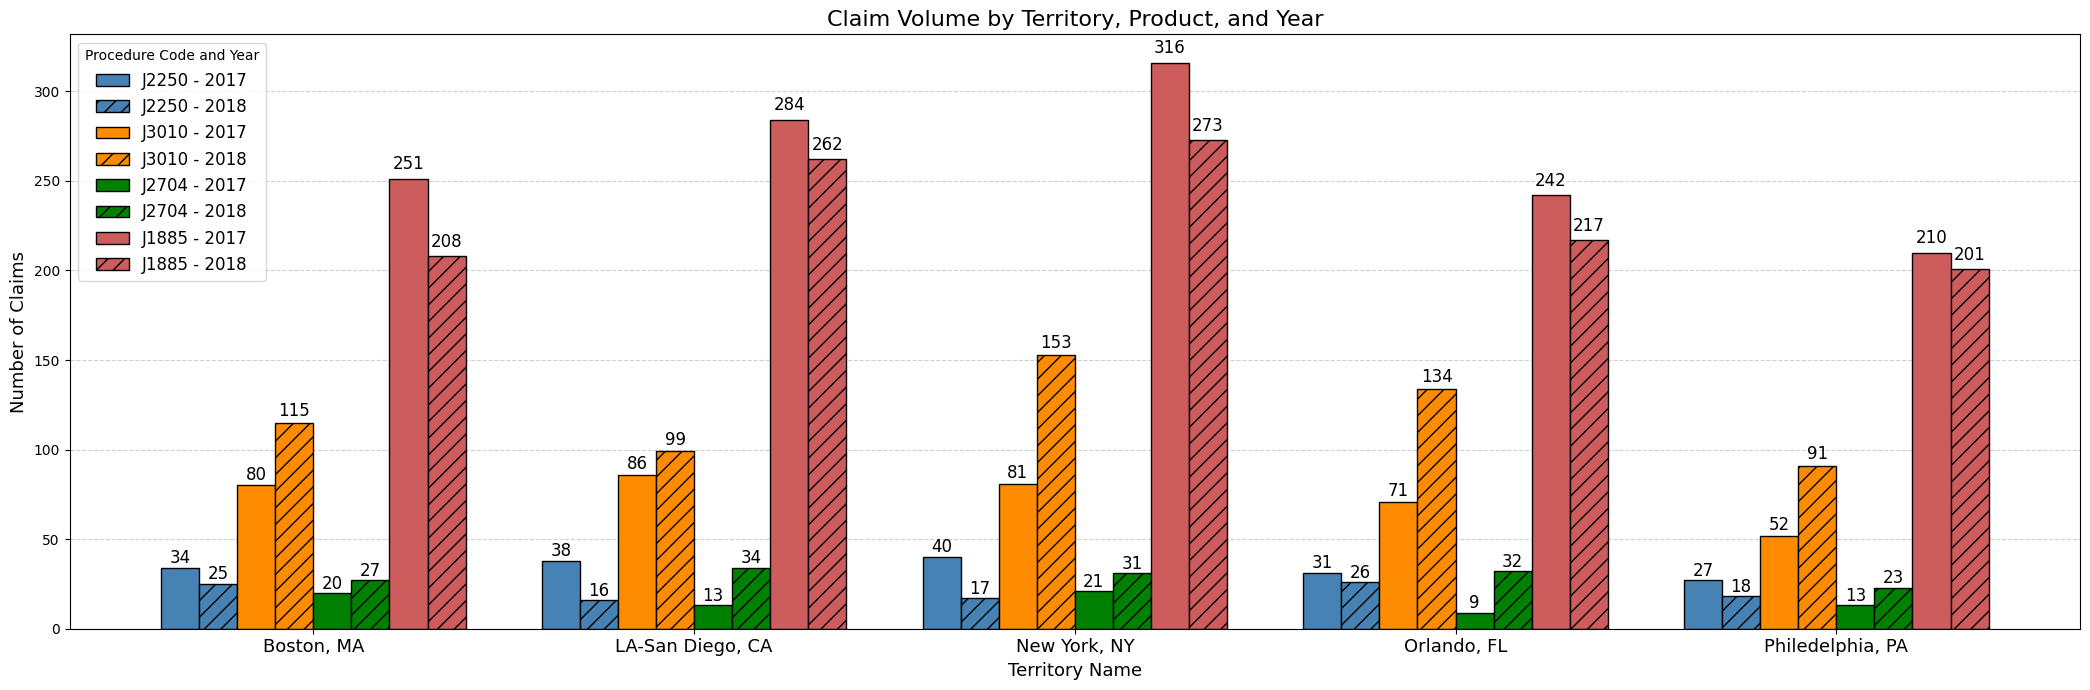

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

target_territories = ['New York, NY', 'Orlando, FL', 'LA-San Diego, CA', 'Boston, MA', 'Philedelphia, PA']
target_years = [2017, 2018]
target_procedures = ['J2250', 'J3010','J2704','J1885']

grouped_df = (
    filtered_df[
        (filtered_df['Territory Name'].isin(target_territories)) &
        (filtered_df['Procedure_code'].isin(target_procedures)) &
        (filtered_df['Year'].isin(target_years))  # Add a 'Claim_Year' column if not already there
    ]
    .groupby(['Territory Name', 'Procedure_code', 'Year'])['Claim_ID'].nunique().reset_index(name='Number_of_Claims')
 #   .count()
 #   .reset_index(name='Number_of_Claims')
)

pivot_df = grouped_df.pivot_table(
    index=['Territory Name', 'Procedure_code'],
    columns='Year',
    values='Number_of_Claims',
    fill_value=0
)

# Reset index if needed
pivot_df = pivot_df.reset_index()

# Set X-axis base
territories = pivot_df['Territory Name'].unique()
x = np.arange(len(territories))

# Reduced bar width definitions
width = 0.2  # Total width allotted for one product group
sub_width = width / 2  # Width for each bar per year

# Colors by product
product_colors = {
    'J2250': 'steelblue',
    'J3010': 'darkorange',
    'J2704': 'green',
    'J1885': 'indianred'
}

# Hatch styles by year
year_hatches = {
    2017: '',
    2018: '//'
}

fig, ax = plt.subplots(figsize=(21, 7))

for i, procedure in enumerate(target_procedures):
    for j, year in enumerate([2017, 2018]):
        subset = pivot_df[pivot_df['Procedure_code'] == procedure]
        # Adjust bar position with slightly increased spacing for visibility
        bar_positions = x + (i - 1.5) * width + (j - 0.5) * sub_width
        values = subset[year]

        # Plot bar with color + hatch
        bars = ax.bar(
            bar_positions,
            values,
            width=sub_width,
            label=f'{procedure} - {year}',
            color=product_colors[procedure],
            hatch=year_hatches[year],
            edgecolor='black',
            zorder=2
        )

        # Add text labels above each bar
        for xpos, val in zip(bar_positions, values):
            ax.text(
                xpos,
                val + max(values) * 0.01,
                f'{int(val)}',
                ha='center',
                va='bottom',
                fontsize=12
            )

# X-axis setup
ax.set_xticks(x)
ax.set_xticklabels(territories, rotation=0,fontsize=13)
ax.set_xlabel('Territory Name',fontsize=13)
ax.set_ylabel('Number of Claims',fontsize=13)
ax.set_title('Claim Volume by Territory, Product, and Year',fontsize=16)
ax.legend(title='Procedure Code and Year',fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


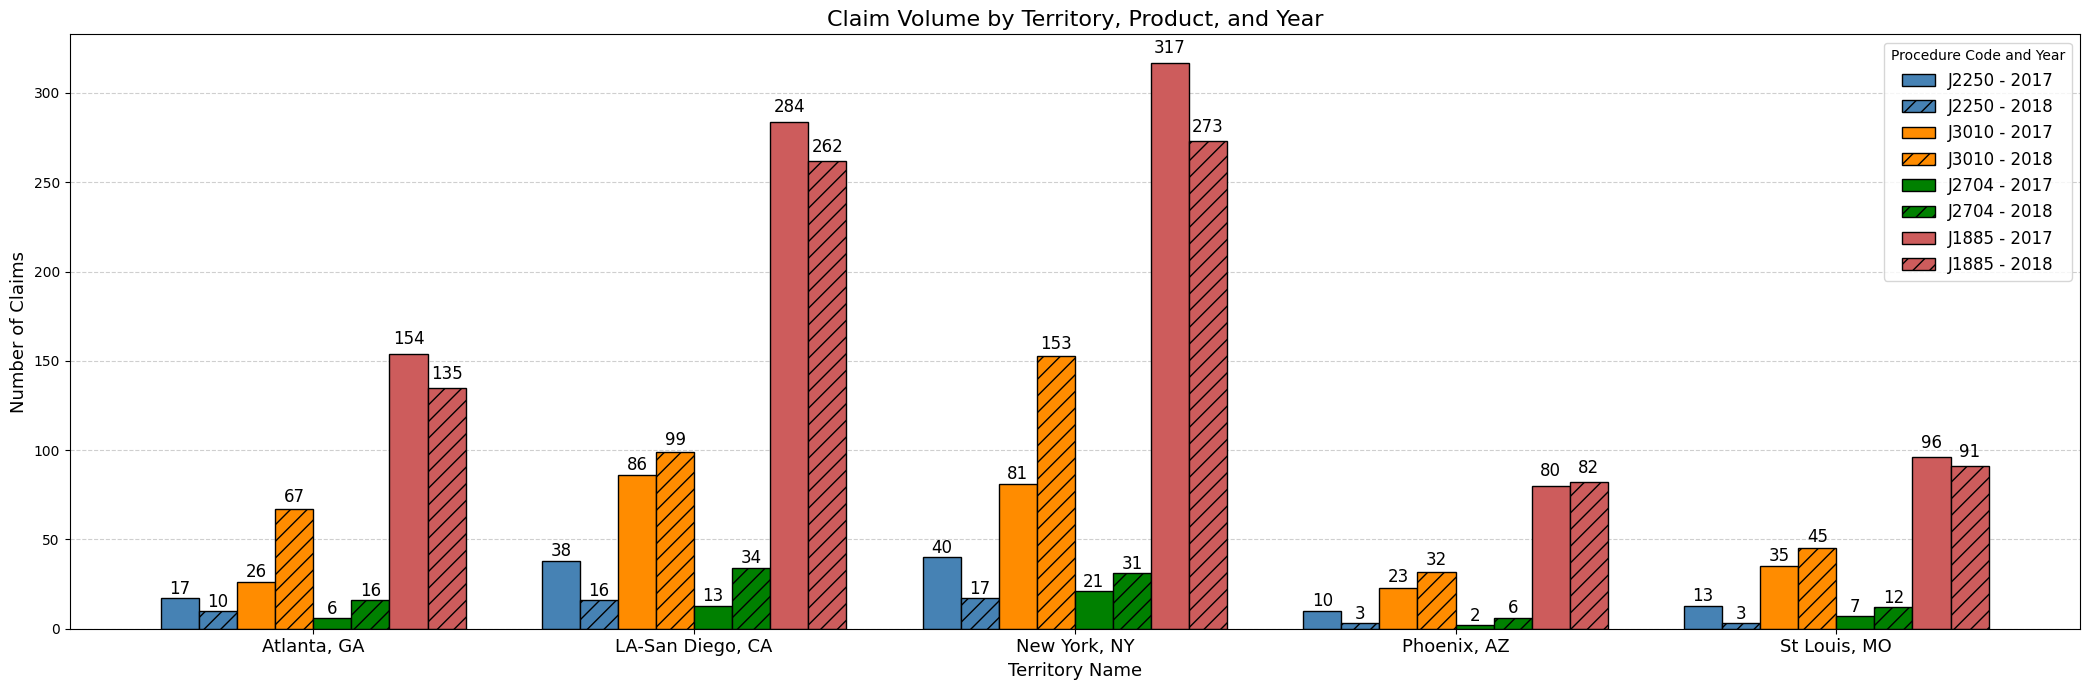

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

target_territories = ['St Louis, MO', 'Phoenix, AZ', 'LA-San Diego, CA', 'New York, NY', 'Atlanta, GA']
target_years = [2017, 2018]
target_procedures = ['J2250', 'J3010','J2704','J1885']

grouped_df = (
    filtered_df[
        (filtered_df['Territory Name'].isin(target_territories)) &
        (filtered_df['Procedure_code'].isin(target_procedures)) &
        (filtered_df['Year'].isin(target_years))  # Add a 'Claim_Year' column if not already there
    ]
    .groupby(['Territory Name', 'Procedure_code', 'Year'])['Claim_ID']
    .count()
    .reset_index(name='Number_of_Claims')
)

pivot_df = grouped_df.pivot_table(
    index=['Territory Name', 'Procedure_code'],
    columns='Year',
    values='Number_of_Claims',
    fill_value=0
)

# Reset index if needed
pivot_df = pivot_df.reset_index()

# Set X-axis base
territories = pivot_df['Territory Name'].unique()
x = np.arange(len(territories))

# Reduced bar width definitions
width = 0.2  # Total width allotted for one product group
sub_width = width / 2  # Width for each bar per year

# Colors by product
product_colors = {
    'J2250': 'steelblue',
    'J3010': 'darkorange',
    'J2704': 'green',
    'J1885': 'indianred'
}

# Hatch styles by year
year_hatches = {
    2017: '',
    2018: '//'
}

fig, ax = plt.subplots(figsize=(21, 7))

for i, procedure in enumerate(target_procedures):
    for j, year in enumerate([2017, 2018]):
        subset = pivot_df[pivot_df['Procedure_code'] == procedure]
        # Adjust bar position with slightly increased spacing for visibility
        bar_positions = x + (i - 1.5) * width + (j - 0.5) * sub_width
        values = subset[year]

        # Plot bar with color + hatch
        bars = ax.bar(
            bar_positions,
            values,
            width=sub_width,
            label=f'{procedure} - {year}',
            color=product_colors[procedure],
            hatch=year_hatches[year],
            edgecolor='black',
            zorder=2
        )

        # Add text labels above each bar
        for xpos, val in zip(bar_positions, values):
            ax.text(
                xpos,
                val + max(values) * 0.01,
                f'{int(val)}',
                ha='center',
                va='bottom',
                fontsize=12
            )

# X-axis setup
ax.set_xticks(x)
ax.set_xticklabels(territories, rotation=0,fontsize=13)
ax.set_xlabel('Territory Name',fontsize=13)
ax.set_ylabel('Number of Claims',fontsize=13)
ax.set_title('Claim Volume by Territory, Product, and Year',fontsize=16)
ax.legend(title='Procedure Code and Year',fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Q1.c. ii.	Calculate the year-over-year change % for the variant brand between 2017 and 2018.:
###Q1.c. iii.	Sort the territories from smallest to largest value from above.

In [ ]:
# Define the target procedure code and years
procedure_code = 'J2250'
target_years = [2017, 2018]

# Filter the DataFrame for the relevant procedure code and years
filtered_df_J2250 = filtered_df[
    (filtered_df['Procedure_code'] == procedure_code) &
    (filtered_df['Year'].isin(target_years))
]

# Group by Territory and Year, and count the number of claims
claims_per_year_J2250 = (
    filtered_df_J2250
    .groupby(['Territory Name', 'Year'])['Claim_ID']
    .count()
    .reset_index(name='Number_of_Claims')
)

# Pivot the data to have years as columns for easier comparison
pivot_df = claims_per_year_J2250.pivot(index='Territory Name', columns='Year', values='Number_of_Claims').fillna(0)
# Calculate the year-over-year change percentage
pivot_df['YoY_Change_%'] = ((pivot_df[2018] - pivot_df[2017]) / pivot_df[2017]) * 100


# Reset index for better readability
pivot_df = pivot_df.reset_index()

# Sort the DataFrame by YoY_Change_% in ascending order
pivot_df_sorted = pivot_df.sort_values(by='YoY_Change_%', ascending=True)

# Drop the 'Year' column
pivot_df_sorted = pivot_df_sorted.reset_index(drop=True)

# Display the results
print(pivot_df_sorted[['Territory Name', 2017, 2018, 'YoY_Change_%']])

print('\n\n')
print('5 territories with the highest % drop:')
print(pivot_df_sorted[['Territory Name', 2017, 2018, 'YoY_Change_%']].head(5))


Year    Territory Name  2017  2018  YoY_Change_%
0         St Louis, MO    13     3    -76.923077
1          Phoenix, AZ    10     3    -70.000000
2     LA-San Diego, CA    38    16    -57.894737
3         New York, NY    40    17    -57.500000
4          Atlanta, GA    17    10    -41.176471
5       Birmingham, AL     8     5    -37.500000
6           Dallas, TX    20    13    -35.000000
7     Philedelphia, PA    27    18    -33.333333
8           Boston, MA    34    25    -26.470588
9     Washington, D.C.    21    16    -23.809524
10         Seattle, WA    16    13    -18.750000
11         Orlando, FL    31    26    -16.129032
12          Denver, CO    14    12    -14.285714
13      Cincinnati, OH    11    10     -9.090909
14          Albany, NY    20    19     -5.000000
15     Minneapolis, MN     5     5      0.000000
16        San Jose, CA    21    23      9.523810
17         Chicago, IL     9    10     11.111111
18         Houston, TX    14    16     14.285714
19       Charlotte, 

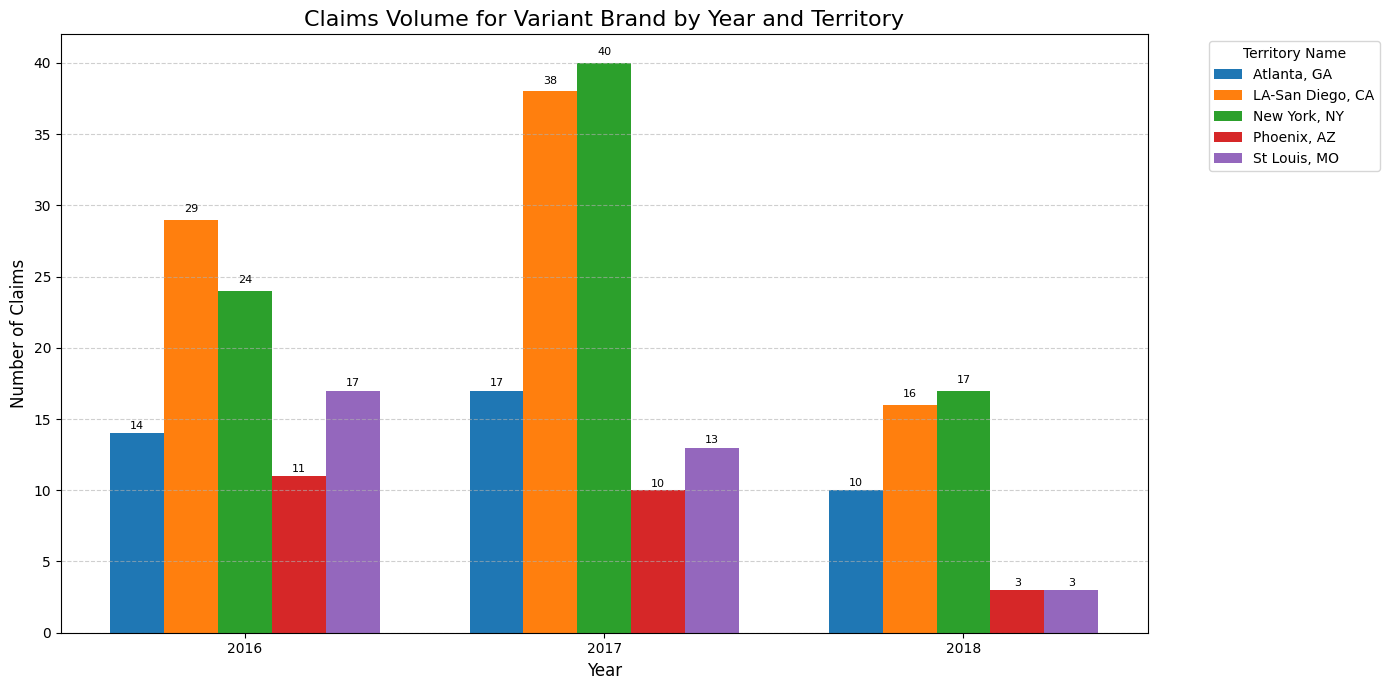

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define targets
target_territories = ['St Louis, MO', 'Phoenix, AZ', 'LA-San Diego, CA', 'New York, NY', 'Atlanta, GA']
target_years = [2016, 2017, 2018]
target_procedures = ['J2250']

# Filter data
filtered_df_variant = filtered_df[
    (filtered_df['Territory Name'].isin(target_territories)) &
    (filtered_df['Procedure_code'].isin(target_procedures)) &
    (filtered_df['Year'].isin(target_years))
]

# Group and pivot
claims_volume = (
    filtered_df_variant
    .groupby(['Year', 'Territory Name'])['Claim_ID']
    .count()
    .reset_index(name='Number_of_Claims')
)

pivot_df = claims_volume.pivot(index='Year', columns='Territory Name', values='Number_of_Claims').fillna(0)
pivot_df = pivot_df.reindex(target_years)  # Ensure correct year order

# Plot setup
years = pivot_df.index.astype(str)
territories = pivot_df.columns
x = np.arange(len(years))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(14, 7))

# Plot each territory's bars
for i, territory in enumerate(territories):
    offsets = x + (i - len(territories)/2) * bar_width + bar_width/2
    values = pivot_df[territory].values
    bars = ax.bar(offsets, values, width=bar_width, label=territory)

    # Add labels on top of bars
    for xpos, val in zip(offsets, values):
        ax.text(
            xpos,
            val + max(values)*0.01,
            str(int(val)),
            ha='center',
            va='bottom',
            fontsize=8
        )

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_xlabel('Year',fontsize = 12)
ax.set_ylabel('Number of Claims',fontsize=12)
ax.set_title('Claims Volume for Variant Brand by Year and Territory',fontsize=16)
ax.legend(title='Territory Name', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


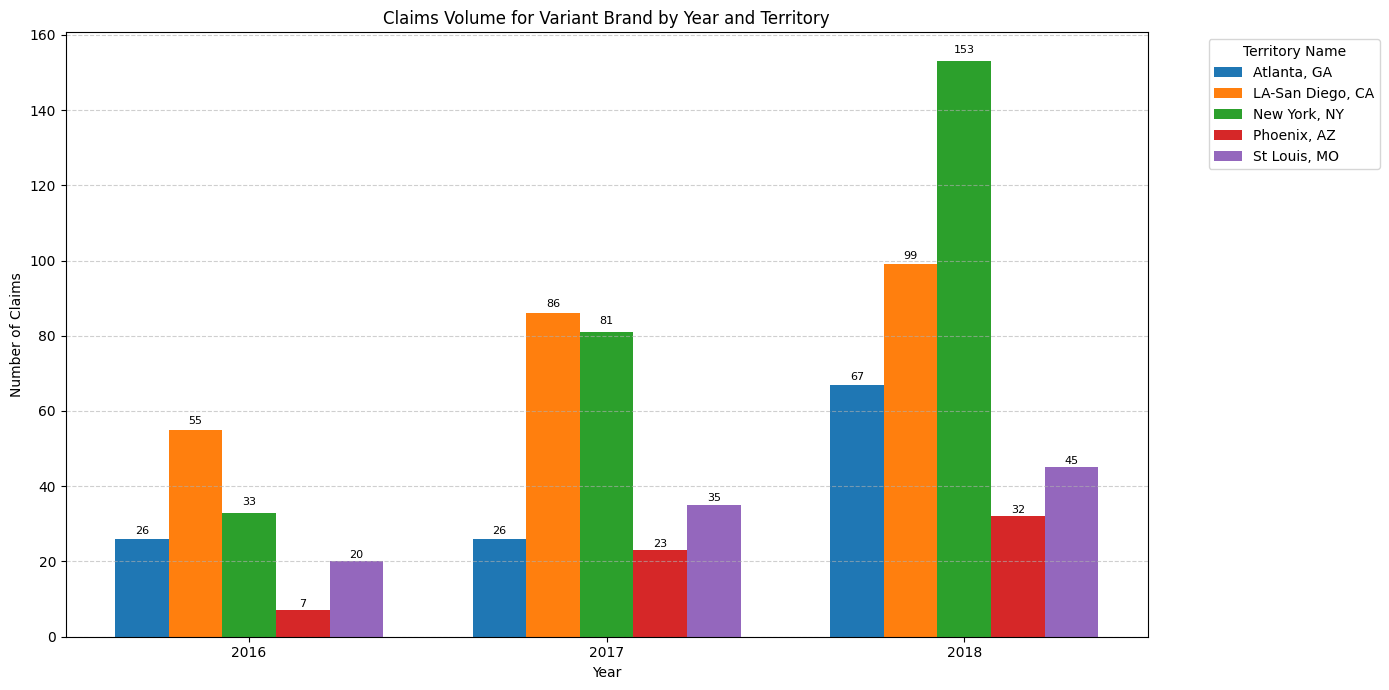

In [ ]:
# Define targets
target_territories = ['St Louis, MO', 'Phoenix, AZ', 'LA-San Diego, CA', 'New York, NY', 'Atlanta, GA']
target_years = [2016, 2017, 2018]
target_procedures = ['J3010']

# Filter data
filtered_df_variant = filtered_df[
    (filtered_df['Territory Name'].isin(target_territories)) &
    (filtered_df['Procedure_code'].isin(target_procedures)) &
    (filtered_df['Year'].isin(target_years))
]

# Group and pivot
claims_volume = (
    filtered_df_variant
    .groupby(['Year', 'Territory Name'])['Claim_ID']
    .count()
    .reset_index(name='Number_of_Claims')
)

pivot_df = claims_volume.pivot(index='Year', columns='Territory Name', values='Number_of_Claims').fillna(0)
pivot_df = pivot_df.reindex(target_years)  # Ensure correct year order

# Plot setup
years = pivot_df.index.astype(str)
territories = pivot_df.columns
x = np.arange(len(years))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(14, 7))

# Plot each territory's bars
for i, territory in enumerate(territories):
    offsets = x + (i - len(territories)/2) * bar_width + bar_width/2
    values = pivot_df[territory].values
    bars = ax.bar(offsets, values, width=bar_width, label=territory)

    # Add labels on top of bars
    for xpos, val in zip(offsets, values):
        ax.text(
            xpos,
            val + max(values)*0.01,
            str(int(val)),
            ha='center',
            va='bottom',
            fontsize=8
        )

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Claims')
ax.set_title('Claims Volume for Variant Brand by Year and Territory')
ax.legend(title='Territory Name', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



###Observation:
1. An analysis of claims data across the five focus territories indicates a significant decline in the volume of claims for Product 2 (J2250), while the competitor product (J3010) has experienced a corresponding increase over the same time period.
2. This inverse trend suggests a potential loss of market share to the competitor within the anesthesia product category.

###Potential Drivers:
1. Product Perception and Clinical Efficacy:
It is possible that Product 2 (J2250) is perceived by healthcare providers (HCPs) as less effective or less safe compared to the competitor’s offering (J3010). This hypothesis can be validated through structured feedback from prescribers and supported by targeted clinical trials aimed at evaluating comparative efficacy and safety.

2. Sales Execution and Coverage Gaps:
Assuming clinical equivalence or superiority of J2250, the underperformance may be attributed to suboptimal sales execution. The competitor’s ability to grow in the same territories indicates strong market demand. This suggests that our sales force may be either inadequately resourced or insufficiently effective in engaging key HCPs and converting demand.

###Recommendations:
1. Reassess and Optimize Sales Force Allocation:
Conduct a sales force capacity and deployment analysis in the five underperforming territories. Increase coverage where gaps exist, ensuring alignment with HCP density and prescribing potential.

2. Enhance Sales Messaging and Positioning:
Equip the sales team with refined messaging that clearly communicates the clinical advantages of J2250 over both the competitor product (J3010) and internal alternatives (e.g., J1885). Emphasize validated safety and efficacy data to build prescriber confidence and regain market traction.


In [ ]:
filtered_df

,Claim_ID,Patient_ID,HCP_NPI_ID,Claim_Date,Procedure_code,Amt_paid_by_insurer,diagnosis_code,claim_cost,City,State,ZIP Code,Specialty,Age,Gender,Territory Name,Region Name,Diagnosis_Code_Mapping_Data,Year
1,787471,12625,6514841039,2016-02-28,J3010,-4.00,C439,NaN,Port Douglas,MP,60960,Cardiology,42,Female,"New York, NY",Northeast,C,2016
2,1000626,11388,6514841039,2018-12-15,J1885,2.53,I5033,NaN,Port Douglas,MP,60960,Cardiology,78,Male,"New York, NY",Northeast,I,2018
3,1306770,11601,3357120922,2017-05-24,J1885,75.63,I10,233.73,Port Paulmouth,VA,40050,Neurology,40,Male,"San Jose, CA",West,I,2017
5,1545036,11058,7218513293,2016-02-27,J2250,1.33,K219,NaN,North Kimberly,KS,27325,Gastroenterology,32,Male,"Houston, TX",Southeast,K,2016
6,1206667,12409,7881980621,2018-12-03,J3010,60.46,I10,113.13,East Tracy,AL,77720,Cardiology,77,Male,"Charlotte, NC",Southeast,I,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19146,674789,11567,2483100161,2018-05-05,J3010,-0.42,K219,NaN,Brianville,MN,43950,Orthopedics,87,Female,"Boston, MA",Northeast,K,2018
19147,275913,12810,2483100161,2017-05-04,J3010,64.78,I10,103.01,Brianville,MN,43950,Orthopedics,84,Male,"Boston, MA",Northeast,I,2017
19148,1458579,10870,6220574465,2017-12-11,J2704,5.68,I429,NaN,Williambury,CT,28164,Anesthesiology,64,Male,"Houston, TX",Southeast,I,2017
19149,496333,11777,6220574465,2018-11-19,J2704,5.73,I10,14.51,Williambury,CT,28164,Anesthesiology,69,Male,"Houston, TX",Southeast,I,2018


## Q2.a. i. A pie chart showing the percentage of claims that each diagnosis specialty contributes. Extract the diagnosis code initial and map the diagnosis specialty using the diagnosis code mapping dataset. Show only the top 5 diagnosis specialties.

In [ ]:
print(filtered_df['Diagnosis_Code_Mapping_Data'].unique())

['C' 'I' 'K' 'Z' 'E' 'M' 'R' 'J' 'F' 'S' 'N' 'T' 'H' 'G' 'D' 'B' 'Y' 'A'
 'L' 'Q' 'W']


In [ ]:
claims_by_diagnosis = (
    filtered_df
    .groupby('Diagnosis_Code_Mapping_Data')['Claim_ID']
    .count()
    .reset_index(name='Number_of_Claims')
    .sort_values(by='Number_of_Claims', ascending=False)
)

print((claims_by_diagnosis).head(5))

   Diagnosis_Code_Mapping_Data  Number_of_Claims
8                            I              6722
20                           Z              1677
15                           R              1171
12                           M              1100
4                            E               687


In [ ]:
import textwrap

# Map diagnosis code initials to specialties
diagnosis_map = {
    'M': 'Diseases of the musculoskeletal system and connective tissue',
    'R': 'Symptoms, signs, and abnormal clinical/lab findings not elsewhere classified',
    'Z': 'Factors influencing health status and contact with health services',
    'E': 'Endocrine, nutritional, and metabolic diseases',
    'I': 'Diseases of the circulatory system',
    'S': 'Injury & Poisoning',
    'H': 'Eye & Ear',
    'G': 'Nervous System',
    'K': 'Digestive System',
    'J': 'Respiratory System',
    'L': 'Skin & Subcutaneous',
}

# Apply mapping
filtered_df['Diagnosis_Specialty'] = filtered_df['Diagnosis_Code_Mapping_Data'].map(diagnosis_map)

# Get top 5 specialties by claim volume
top_diag = filtered_df['Diagnosis_Specialty'].value_counts().nlargest(5).sort_values(ascending = False)



<ipython-input-39-e4b820920844>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Diagnosis_Specialty'] = filtered_df['Diagnosis_Code_Mapping_Data'].map(diagnosis_map)


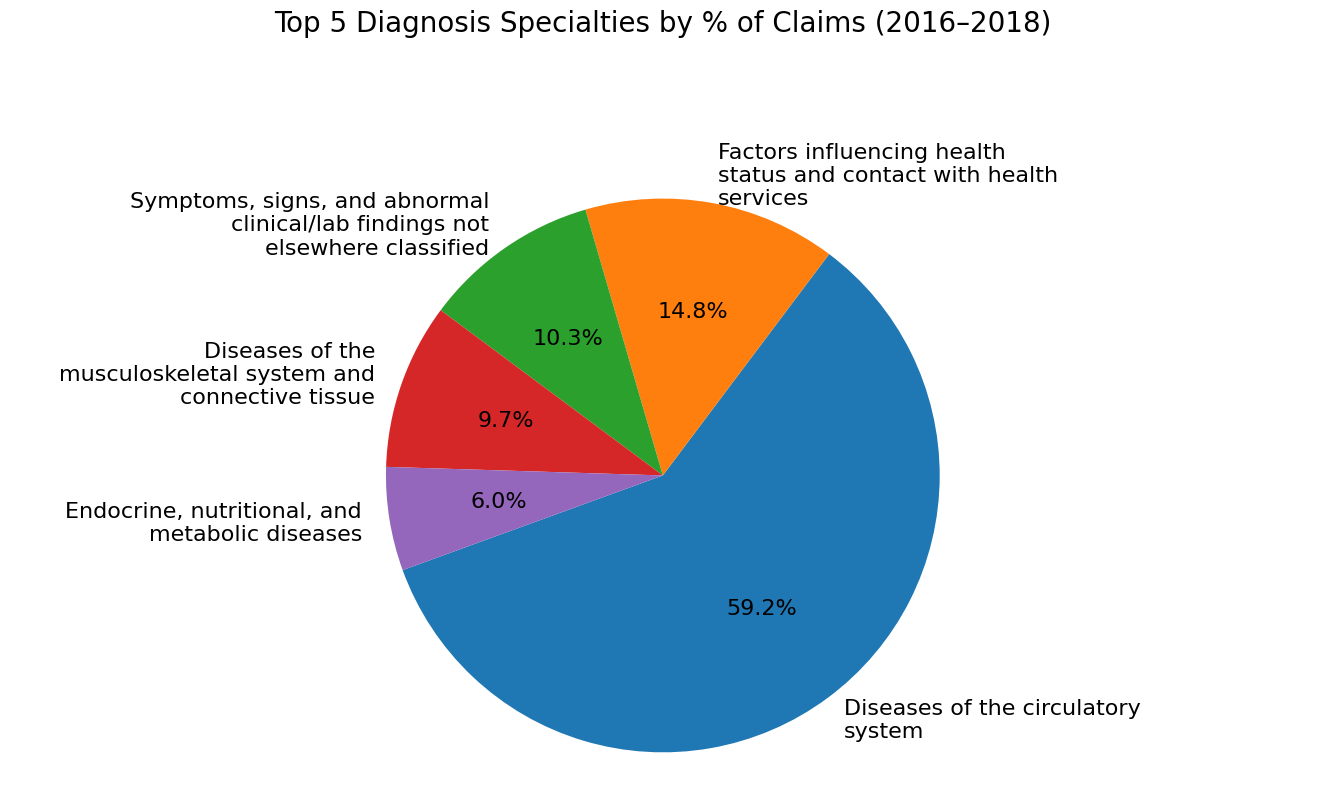

In [ ]:
import textwrap
# Prepare labels and wrap long text
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=30)) for label in top_diag.index]

# Plot pie chart using Matplotlib
plt.figure(figsize=(14, 8))
plt.pie(
    top_diag.values,
    labels=wrapped_labels,
    autopct='%1.1f%%',
    startangle=200,
    textprops={'fontsize': 16}  # Bigger label font size
)
plt.title('Top 5 Diagnosis Specialties by % of Claims (2016–2018)', fontsize=20, pad=100)
plt.ylabel('', fontsize=20)  # Bigger label font size
plt.axis('equal')  # Keep it circular
plt.tight_layout()
plt.show()

<ipython-input-41-0a3b3d847ffd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_diag.values, y=wrapped_labels, palette='viridis')


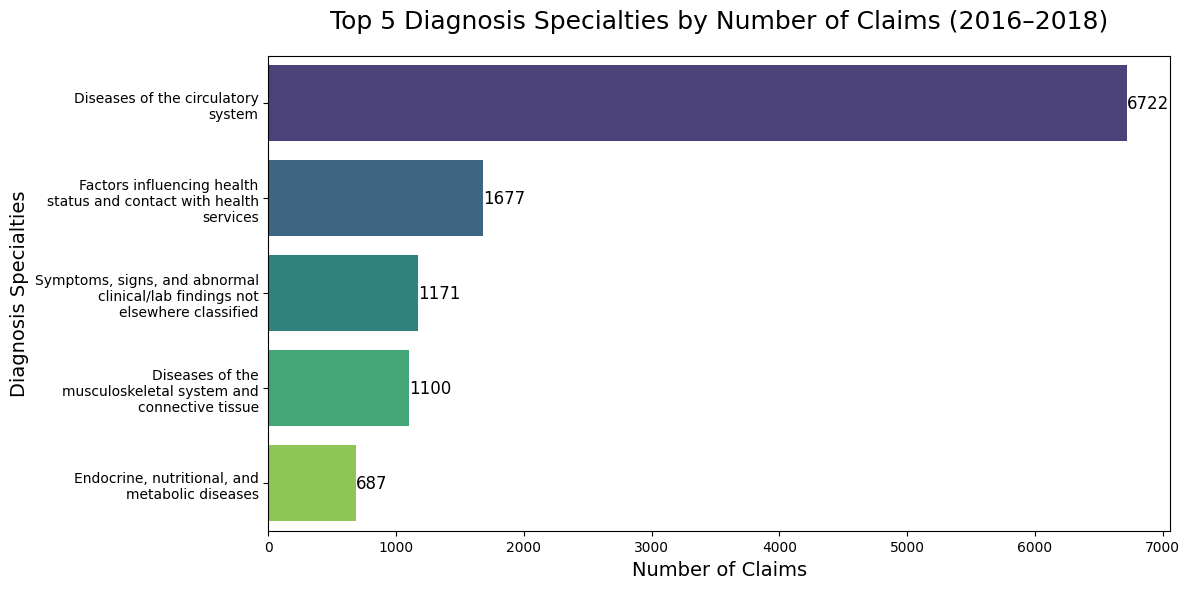

In [ ]:
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns

# Wrap long labels
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=30)) for label in top_diag.index]

# Set figure size
plt.figure(figsize=(12, 6))

# Create horizontal bar chart
ax = sns.barplot(x=top_diag.values, y=wrapped_labels, palette='viridis')

# Annotate bars with percentage values
for i, v in enumerate(top_diag.values):
    ax.text(v + 0.5, i, f'{v:.0f}', color='black', va='center', fontsize=12)

# Set titles and labels
plt.title('Top 5 Diagnosis Specialties by Number of Claims (2016–2018)', fontsize=18, pad=20)
plt.xlabel('Number of Claims', fontsize=14)
plt.ylabel('Diagnosis Specialties', fontsize=14)
plt.tight_layout()
plt.show()


## Observations:

1. From the above pie chart, we can see that the Diagnosis speciality with code I, for 'Diseases of Circulatory System', contributes the highest percentage (~60%) of overall claims for these 4 products.

****

## Q2.a.2 2.	A horizontal line graph showing # of writers from each HCP specialty group mapped using the HCP demographics dataset.

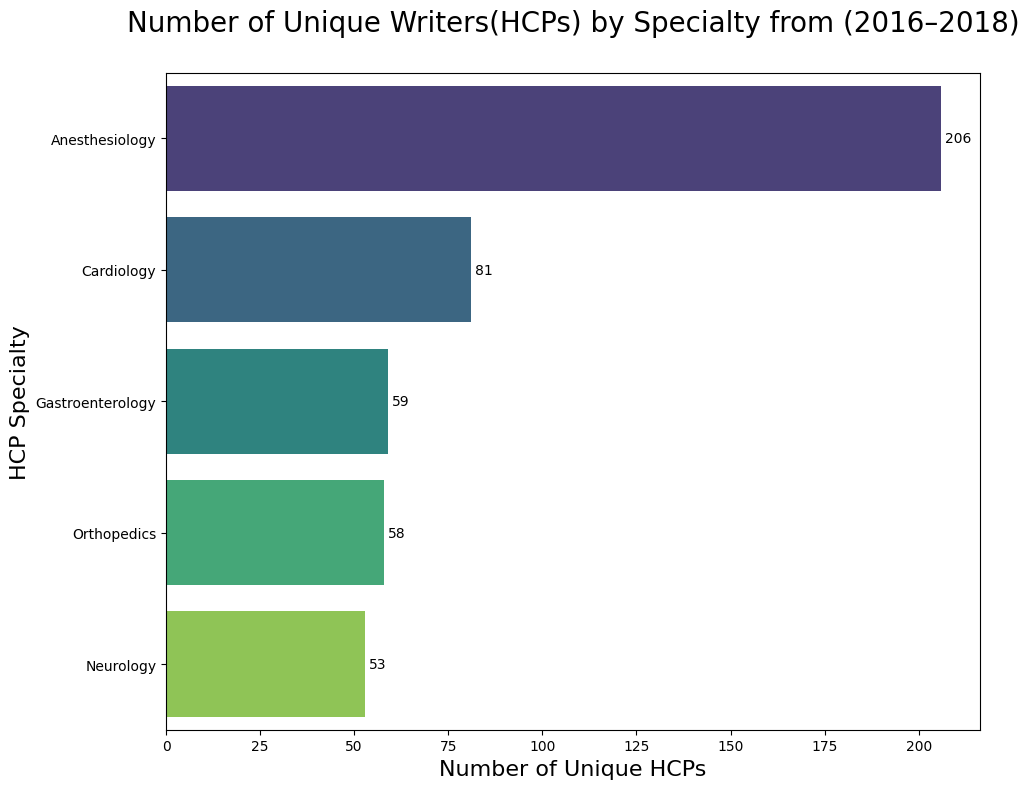

In [ ]:
import warnings
warnings.filterwarnings('ignore')


# Count unique HCPs per specialty
hcp_specialty_counts = filtered_df.groupby('Specialty')['HCP_NPI_ID'].nunique().sort_values(ascending=False)

# Set figure size first
plt.figure(figsize=(10, 8))

# Plot horizontal bar chart
ax = sns.barplot(x=hcp_specialty_counts.values, y=hcp_specialty_counts.index, palette='viridis')

# Add labels to bars
for i, v in enumerate(hcp_specialty_counts.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontsize=10)

# Title and labels
plt.title('Number of Unique Writers(HCPs) by Specialty from (2016–2018)', fontsize=20, pad=30)
plt.xlabel('Number of Unique HCPs', fontsize=16)
plt.ylabel('HCP Specialty', fontsize=16)
plt.tight_layout()
plt.show()


###Observation:

1. From the above graph we can see that, 206 HCPs with speciality 'Anesthesiology' write prescriptions for any of these 4 products, followed by 81 HCPs with 'Cardiology' as the speciality.
2. Thus our target HCPs should be doctrs with the following specialities:

a. Anesthesiology

b. Cardiology

c. Gastroenterology

d. Orthopedics

e. Neurology

In [ ]:
print(filtered_df.columns.tolist())


num_unique_patients = filtered_df['Patient_ID'].nunique()
print("Number of unique patients:", num_unique_patients)

['Claim_ID', 'Patient_ID', 'HCP_NPI_ID', 'Claim_Date', 'Procedure_code', 'Amt_paid_by_insurer', 'diagnosis_code', 'claim_cost', 'City', 'State', 'ZIP Code', 'Specialty', 'Age', 'Gender', 'Territory Name', 'Region Name', 'Diagnosis_Code_Mapping_Data', 'Year', 'Diagnosis_Specialty']
Number of unique patients: 3690


In [ ]:
filtered_patients_df = filtered_df.drop_duplicates(subset='Patient_ID')
filtered_patients_df

,Claim_ID,Patient_ID,HCP_NPI_ID,Claim_Date,Procedure_code,Amt_paid_by_insurer,diagnosis_code,claim_cost,City,State,ZIP Code,Specialty,Age,Gender,Territory Name,Region Name,Diagnosis_Code_Mapping_Data,Year,Diagnosis_Specialty
1,787471,12625,6514841039,2016-02-28,J3010,-4.00,C439,NaN,Port Douglas,MP,60960,Cardiology,42,Female,"New York, NY",Northeast,C,2016,NaN
2,1000626,11388,6514841039,2018-12-15,J1885,2.53,I5033,NaN,Port Douglas,MP,60960,Cardiology,78,Male,"New York, NY",Northeast,I,2018,Diseases of the circulatory system
3,1306770,11601,3357120922,2017-05-24,J1885,75.63,I10,233.73,Port Paulmouth,VA,40050,Neurology,40,Male,"San Jose, CA",West,I,2017,Diseases of the circulatory system
5,1545036,11058,7218513293,2016-02-27,J2250,1.33,K219,NaN,North Kimberly,KS,27325,Gastroenterology,32,Male,"Houston, TX",Southeast,K,2016,Digestive System
6,1206667,12409,7881980621,2018-12-03,J3010,60.46,I10,113.13,East Tracy,AL,77720,Cardiology,77,Male,"Charlotte, NC",Southeast,I,2018,Diseases of the circulatory system
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,1620160,10762,3145574071,2018-08-02,J3010,58.49,I10,96.71,West Randall,FM,41314,Anesthesiology,50,Female,"San Jose, CA",West,I,2018,Diseases of the circulatory system
19075,254581,10205,6938955662,2017-10-07,J3010,10.12,Z79899,NaN,Perezburgh,NM,89418,Cardiology,72,Male,"Cincinnati, OH",Midwest,Z,2017,Factors influencing health status and contact ...
19077,166875,11083,3985817006,2018-07-19,J3010,66.97,I10,80.32,Nataliechester,WY,44615,Anesthesiology,37,Female,"Boston, MA",Northeast,I,2018,Diseases of the circulatory system
19141,1096457,68,3363403305,2016-04-12,J2250,6.70,I10,9.00,East Amanda,NE,12953,Anesthesiology,26,Female,"Atlanta, GA",Southeast,I,2016,Diseases of the circulatory system


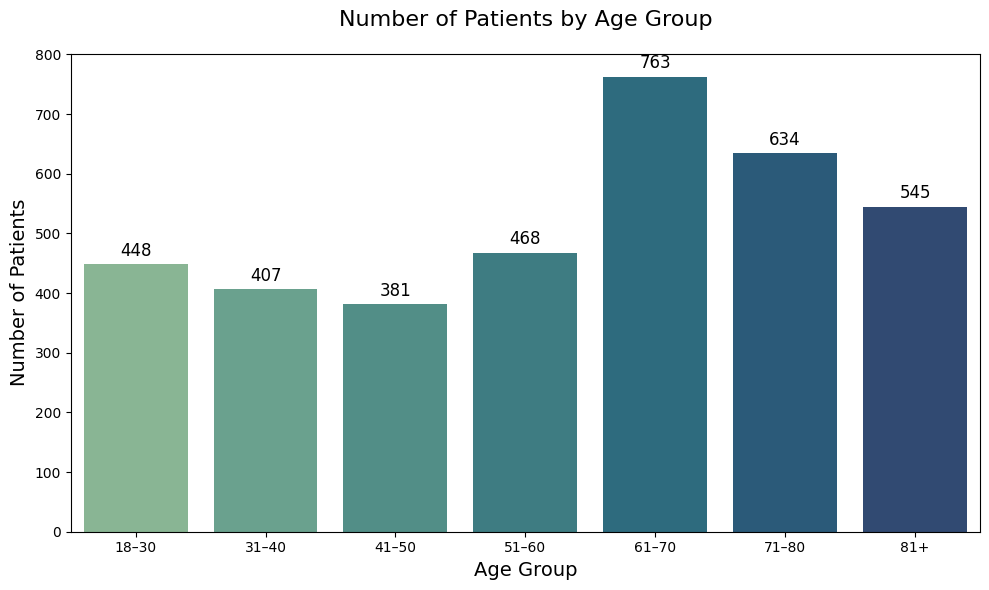

In [ ]:
# Define bins and labels
age_bins = [18, 30, 40, 50, 60, 70, 80, float('inf')]
age_labels = ['18–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81+']

# Create age group column

filtered_patients_df['Age_Group'] = pd.cut(filtered_patients_df['Age'], bins=age_bins, labels=age_labels, right=True)# Count patients per age group
age_group_counts = filtered_patients_df['Age_Group'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='crest')

# Add labels to all bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=12)

# Customize titles and axes
plt.title('Number of Patients by Age Group', fontsize=16, pad=20)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.tight_layout()
plt.show()


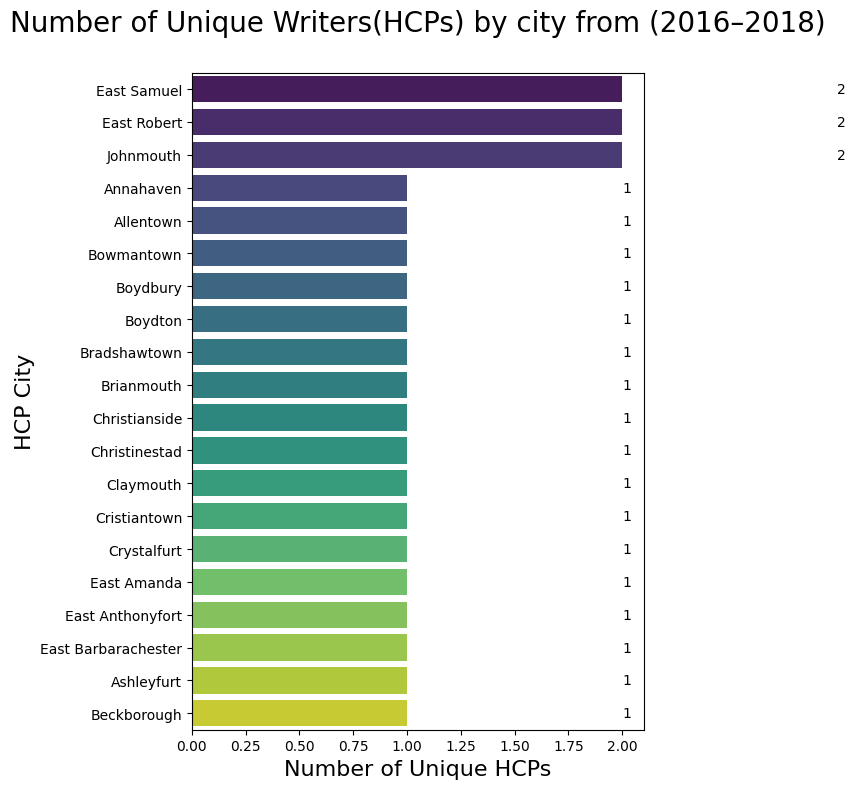

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Define targets
target_territories = ['St Louis, MO', 'Phoenix, AZ', 'LA-San Diego, CA', 'New York, NY', 'Atlanta, GA']
target_years = [2016, 2017, 2018]
target_procedures = ['J3010','J2250','J1885','J2704']

# Filter data
filtered_df_variant = filtered_df[
    (filtered_df['Territory Name'].isin(target_territories)) &
    (filtered_df['Procedure_code'].isin(target_procedures)) &
    (filtered_df['Year'].isin(target_years))
]

# Count unique HCPs per specialty
hcp_city_counts = filtered_df_variant.groupby('City')['HCP_NPI_ID'].nunique().sort_values(ascending=False).head(20)

# Set figure size first
plt.figure(figsize=(10, 8))

# Plot horizontal bar chart
ax = sns.barplot(x=hcp_city_counts.values, y=hcp_city_counts.index, palette='viridis')

# Add labels to bars
for i, v in enumerate(hcp_city_counts.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontsize=10)

# Title and labels
plt.title('Number of Unique Writers(HCPs) by city from (2016–2018)', fontsize=20, pad=30)
plt.xlabel('Number of Unique HCPs', fontsize=16)
plt.ylabel('HCP City', fontsize=16)
plt.tight_layout()
plt.show()


### Q2.b.2.	A bar graph showing percentage of claims from all 4 brands using the same age buckets as above.

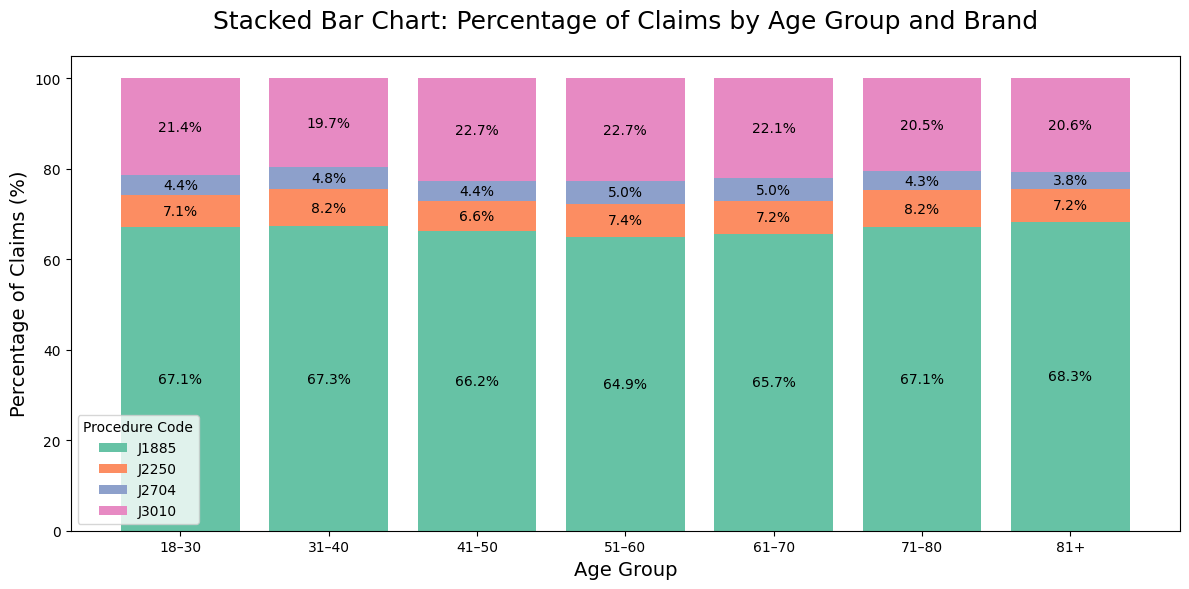

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define age bins and labels
age_bins = [18, 30, 40, 50, 60, 70, 80, float('inf')]
age_labels = ['18–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81+']

# Create age group column
filtered_df['Age_Group'] = pd.cut(filtered_df['Age'], bins=age_bins, labels=age_labels, right=True)

# Count number of claims per Age_Group and Procedure_code
claims_by_age_brand = (
    filtered_df
    .groupby(['Age_Group', 'Procedure_code'])['Claim_ID']
    .count()
    .reset_index(name='Claim_Count')
)

# Calculate percentage of claims per age group
total_claims_per_age = claims_by_age_brand.groupby('Age_Group')['Claim_Count'].transform('sum')
claims_by_age_brand['Percentage'] = (claims_by_age_brand['Claim_Count'] / total_claims_per_age) * 100

# Pivot for stacked bar chart
pivot_df = claims_by_age_brand.pivot(index='Age_Group', columns='Procedure_code', values='Percentage')
pivot_df = pivot_df.reindex(age_labels).fillna(0)  # Ensure order and no missing values

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bottom = [0] * len(pivot_df)

colors = plt.cm.Set2.colors  # Use Set2 colormap
for i, col in enumerate(pivot_df.columns):
    bar = ax.bar(pivot_df.index, pivot_df[col], bottom=bottom, label=col, color=colors[i % len(colors)])

    # Add percentage labels
    for j, value in enumerate(pivot_df[col]):
        if value > 1:  # Optional: Skip tiny segments
            ax.text(j, bottom[j] + value / 2, f"{value:.1f}%", ha='center', va='center', fontsize=10)

    bottom = [bottom[k] + pivot_df[col].iloc[k] for k in range(len(pivot_df))]

# Final plot adjustments
ax.set_title('Stacked Bar Chart: Percentage of Claims by Age Group and Brand', fontsize=18, pad=20)
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Percentage of Claims (%)', fontsize=14)
ax.legend(title='Procedure Code')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

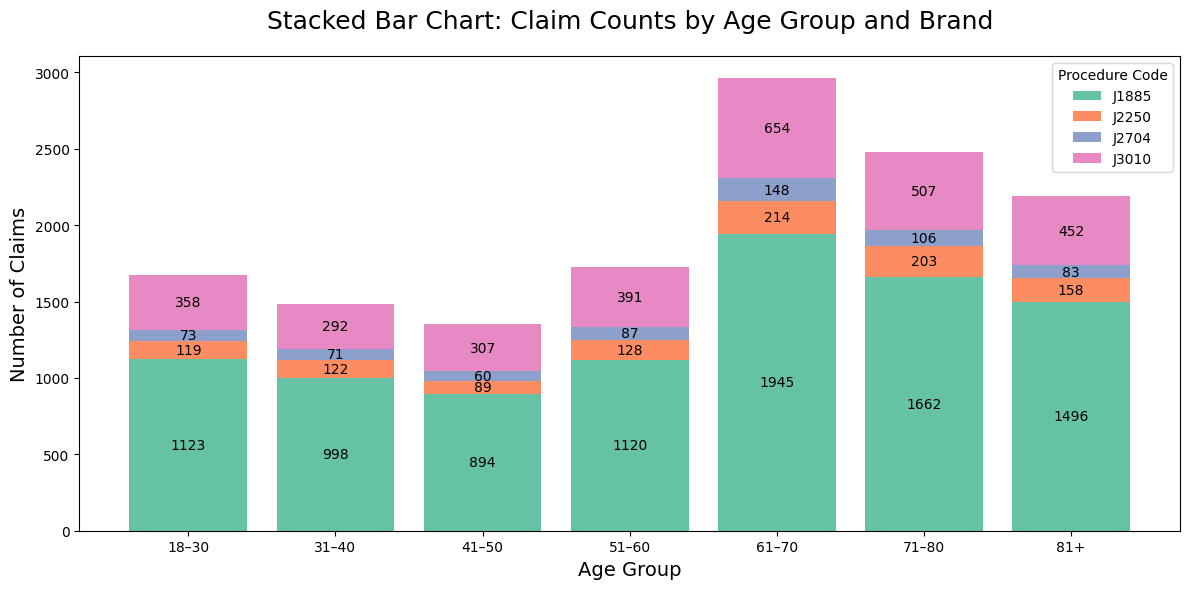

In [ ]:
# Define age bins and labels
age_bins = [18, 30, 40, 50, 60, 70, 80, float('inf')]
age_labels = ['18–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81+']

# Create age group column
filtered_df['Age_Group'] = pd.cut(filtered_df['Age'], bins=age_bins, labels=age_labels, right=True)

# Count number of claims per Age_Group and Procedure_code
claims_by_age_brand = (
    filtered_df
    .groupby(['Age_Group', 'Procedure_code'])['Claim_ID']
    .count()
    .reset_index(name='Claim_Count')
)

# Pivot for stacked bar chart
pivot_df = claims_by_age_brand.pivot(index='Age_Group', columns='Procedure_code', values='Claim_Count')
pivot_df = pivot_df.reindex(age_labels).fillna(0)  # Ensure order and no NaNs

# Plot stacked bar chart with actual values
fig, ax = plt.subplots(figsize=(12, 6))
bottom = [0] * len(pivot_df)

colors = plt.cm.Set2.colors  # Distinct colors
for i, col in enumerate(pivot_df.columns):
    values = pivot_df[col].values
    bar = ax.bar(pivot_df.index, values, bottom=bottom, label=col, color=colors[i % len(colors)])

    # Add labels to each bar segment
    for j, value in enumerate(values):
        if value > 0:
            ax.text(j, bottom[j] + value / 2, f"{int(value)}", ha='center', va='center', fontsize=10)

    bottom = [bottom[k] + values[k] for k in range(len(values))]

# Customize plot
ax.set_title('Stacked Bar Chart: Claim Counts by Age Group and Brand', fontsize=18, pad=20)
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Number of Claims', fontsize=14)
ax.legend(title='Procedure Code')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###Observation:

1. We can see that product 2 is prescribed more in the age brackets (31-40) and (71-80).

2. The highest prescribed products in all age groups id Product 1 (J1885)

3. The anesthesia medications are mostly prescribed for the age group greater than 61 years.

In [ ]:
claim_count_per_hcpcs_df = filtered_df.groupby('Procedure_code').agg(
    uniq_clm_cnt=('Claim_ID', 'nunique')
).sort_values('uniq_clm_cnt', ascending=False)

claim_count_per_hcpcs_df

,uniq_clm_cnt
Procedure_code,
J1885,9262
J3010,2984
J2250,1046
J2704,634


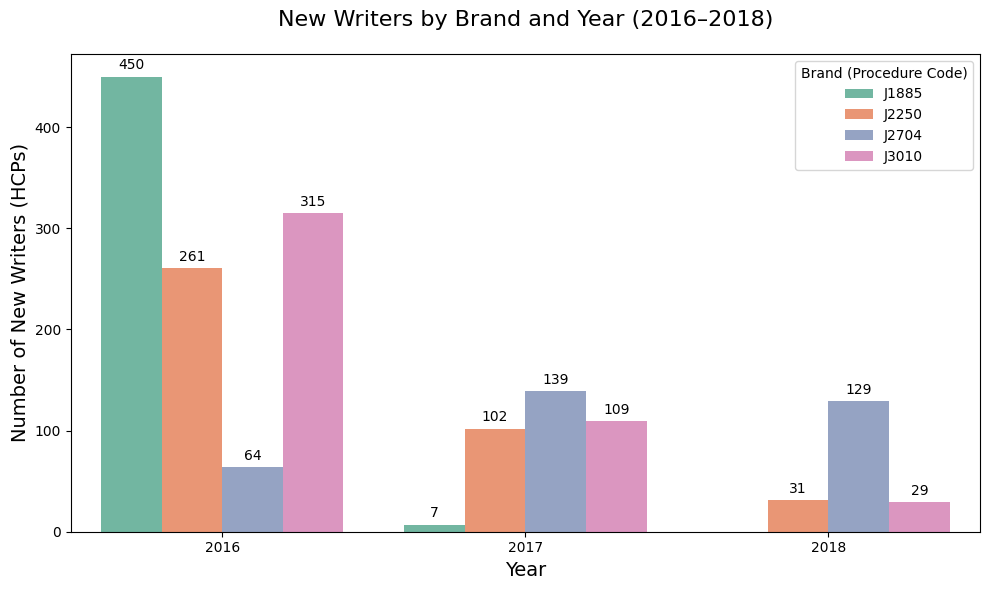

In [ ]:
# Make sure Year column exists and is int
filtered_df['Year'] = pd.to_datetime(filtered_df['Claim_Date']).dt.year

# Filter for years of interest
years = [2016, 2017, 2018]
filtered_df = filtered_df[filtered_df['Year'].isin(years)]

# Sort for reproducibility
filtered_df = filtered_df.sort_values(by='Year')

# Identify first prescription year for each HCP-brand pair
first_prescription = (
    filtered_df.groupby(['HCP_NPI_ID', 'Procedure_code'])['Year']
    .min()
    .reset_index()
    .rename(columns={'Year': 'First_Year_Prescribed'})
)

# Merge with original data to track which prescriptions are new in the given year
merged_df = filtered_df.merge(first_prescription, on=['HCP_NPI_ID', 'Procedure_code'])

# Only keep records where that brand was first prescribed in that year = New Writers
new_writers_df = merged_df[merged_df['Year'] == merged_df['First_Year_Prescribed']]

# Count new writers by year and Procedure_code
new_writer_counts = (
    new_writers_df.groupby(['Year', 'Procedure_code'])['HCP_NPI_ID']
    .nunique()
    .reset_index(name='New_Writer_Count')
)

# Plot clustered bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=new_writer_counts, x='Year', y='New_Writer_Count', hue='Procedure_code', palette='Set2')

# Add labels to bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', padding=3, fontsize=10)

# Formatting
plt.title('New Writers by Brand and Year (2016–2018)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of New Writers (HCPs)', fontsize=14)
plt.legend(title='Brand (Procedure Code)', fontsize=10)
plt.tight_layout()
plt.show()

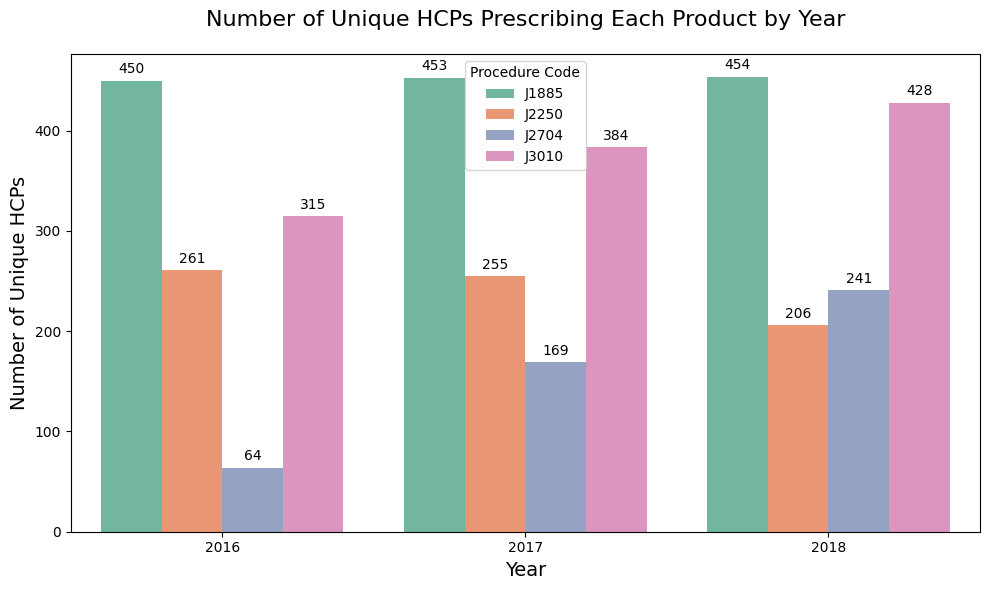

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Year' column is present or extract from date
filtered_df['Year'] = pd.to_datetime(filtered_df['Claim_Date']).dt.year

# Group by Year and Procedure_code, count unique HCPs
hcp_counts = (
    filtered_df
    .groupby(['Year', 'Procedure_code'])['HCP_NPI_ID']
    .nunique()
    .reset_index(name='Unique_HCPs')
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=hcp_counts, x='Year', y='Unique_HCPs', hue='Procedure_code', palette='Set2')

# Add labels to each bar
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', padding=3, fontsize=10)

# Titles and labels
plt.title('Number of Unique HCPs Prescribing Each Product by Year', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Unique HCPs', fontsize=14)
plt.legend(title='Procedure Code')
plt.tight_layout()
plt.show()


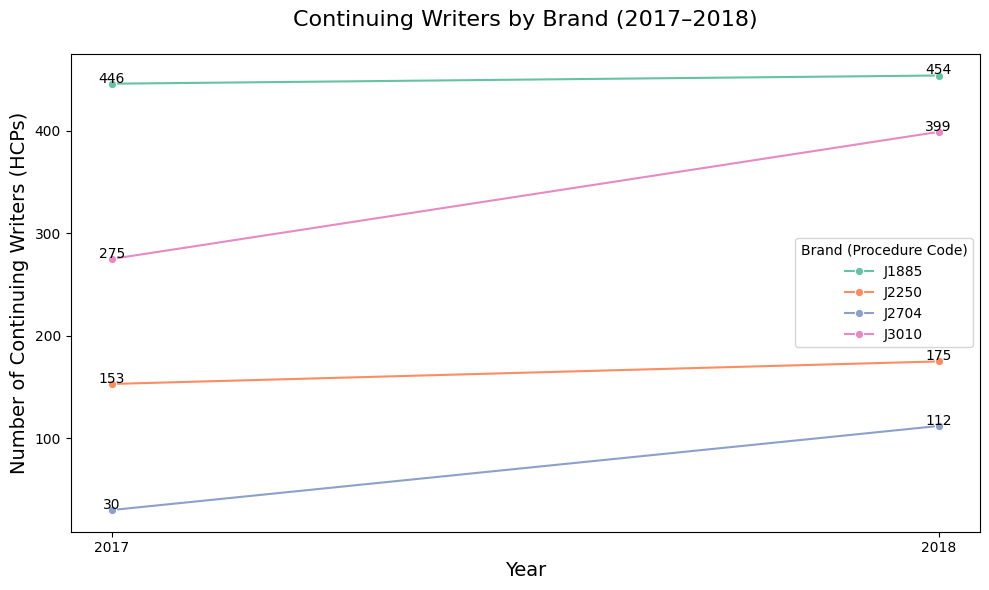

In [ ]:
# Ensure correct year format
filtered_df['Year'] = pd.to_datetime(filtered_df['Claim_Date']).dt.year

# Filter for 2017 and 2018 only
df = filtered_df[filtered_df['Year'].isin([2017, 2018])]

# Get first year each HCP prescribed each brand
first_brand_year = (
    filtered_df.groupby(['HCP_NPI_ID', 'Procedure_code'])['Year']
    .min()
    .reset_index()
    .rename(columns={'Year': 'First_Year_Prescribed'})
)

# Merge back to track new writers
df = df.merge(first_brand_year, on=['HCP_NPI_ID', 'Procedure_code'])

# New Writers: HCPs writing brand for the first time in that year
new_writer_counts = (
    df[df['Year'] == df['First_Year_Prescribed']]
    .groupby(['Year', 'Procedure_code'])['HCP_NPI_ID']
    .nunique()
    .reset_index(name='New_Writers')
)

# Total Writers: All unique HCPs who wrote each brand in each year
total_writer_counts = (
    df.groupby(['Year', 'Procedure_code'])['HCP_NPI_ID']
    .nunique()
    .reset_index(name='Total_Writers')
)

# Merge both to compute Continuing Writers
writer_df = pd.merge(total_writer_counts, new_writer_counts, on=['Year', 'Procedure_code'], how='left')
writer_df['New_Writers'] = writer_df['New_Writers'].fillna(0)
writer_df['Continuing_Writers'] = writer_df['Total_Writers'] - writer_df['New_Writers']

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=writer_df, x='Year', y='Continuing_Writers', hue='Procedure_code', marker='o', palette='Set2')

# Add value labels
for _, row in writer_df.iterrows():
    plt.text(row['Year'], row['Continuing_Writers'] + 1, int(row['Continuing_Writers']),
             ha='center', fontsize=10)

# Formatting
plt.title('Continuing Writers by Brand (2017–2018)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Continuing Writers (HCPs)', fontsize=14)
plt.legend(title='Brand (Procedure Code)')
plt.xticks([2017, 2018])
plt.tight_layout()
plt.show()


-Geographical location

-Financials

